In [1]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from matplotlib import pyplot as plt
import time
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.ndimage.measurements import label
import time
import pickle

from moviepy.editor import VideoFileClip
from IPython.display import HTML

from src.search import *
from src.preprocessing import *
from src.train import *

%matplotlib inline

# Search Pipeline
YSTART = 400
YSTOP = 656
ORIENT = 9
PIX_PER_CELL=8
CELL_PER_BLOCK=2
HOG_CHANNEL = [0,1,2]
VEHICLE_IMG_FOLDER, NONVEHICLE_IMG_FOLDER = "training_images/vehicles", "training_images/non-vehicles"

## Training Pipeline

In [2]:
vehicle_img_path, non_vehicle_img_path = read_images()
print("Retrieved the image paths...")
print("{} images found".format(len(vehicle_img_path) + len(non_vehicle_img_path)))

# HOG Features
nb_samples = 5000
hog_features_vehicles = np.array([create_hog_features(_img) for _img in vehicle_img_path[:nb_samples//2]])
hog_features_non_vehicles = np.array([create_hog_features(_img) for _img in non_vehicle_img_path[:nb_samples//2]])
print("Created HOG Features...")

X = np.vstack((hog_features_vehicles, hog_features_non_vehicles)).astype(np.float64)
y = np.hstack((np.ones(hog_features_vehicles.shape[0]), np.zeros(hog_features_non_vehicles.shape[0])))
train_model(X,y)

Retrieved the image paths...
17760 images found


KeyboardInterrupt: 

In [3]:
assert X.shape[1], 5292
assert plt.imread(vehicle_img_path[0]).shape, (64, 64, 3)

## Search Pipeline 

In [2]:
img = cv2.imread("test_images/test5.jpg")
image_size = img.shape[:2]
detector = Detector(ORIENT, image_size, PIX_PER_CELL, CELL_PER_BLOCK)

In [3]:
detector.image = img
detector.find_proposed_regions()
#detector.update_heatmap()

128 proposed regions


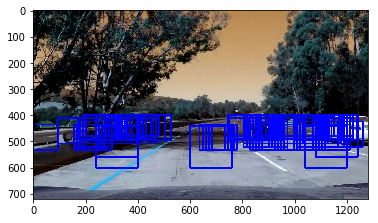

In [4]:
_img = detector.show_proposed_regions()
plt.imshow(_img)

nan

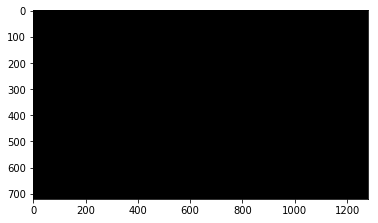

In [5]:
plt.imshow(detector.heatmap,cmap='gray')
detector.heatmap[np.nonzero(detector.heatmap)].mean()

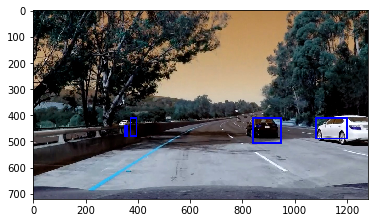

In [6]:
detector.detect()
_img = detector.show_labels()
plt.imshow(_img,cmap='gray')

In [14]:
img = cv2.imread("test_images/test3.jpg")
image_size = img.shape[:2]
detector = Detector(ORIENT, image_size, PIX_PER_CELL, CELL_PER_BLOCK)
def process(img, detector):
    return detector.process(img)
fun = lambda x: process(x, detector)

2 proposed regions for scale 2.5
32 proposed regions for scale 1.5
13 proposed regions for scale 1.25


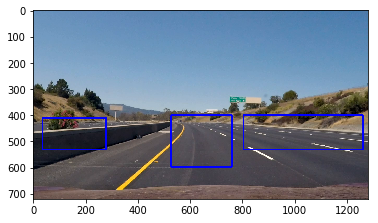

In [22]:
#Video
clip2 = VideoFileClip('project_video.mp4')
img = clip2.get_frame(65)
_img = fun(img)
plt.imshow(_img)

In [9]:
# Video proccessing
output = 'annotated_project_video.mp4'
clip2 = VideoFileClip('project_video.mp4')
challenge_clip = clip2.fl_image(fun)
%time challenge_clip.write_videofile(output, audio=False)

2 proposed regions for scale 2.5
32 proposed regions for scale 1.5
13 proposed regions for scale 1.25
[MoviePy] >>>> Building video annotated_project_video.mp4
[MoviePy] Writing video annotated_project_video.mp4


  0%|          | 0/1261 [00:00<?, ?it/s]

2 proposed regions for scale 2.5
32 proposed regions for scale 1.5
13 proposed regions for scale 1.25


  0%|          | 1/1261 [00:00<06:16,  3.35it/s]

2 proposed regions for scale 2.5
31 proposed regions for scale 1.5


  0%|          | 2/1261 [00:00<06:42,  3.13it/s]

12 proposed regions for scale 1.25
4 proposed regions for scale 2.5
27 proposed regions for scale 1.5


  0%|          | 3/1261 [00:01<07:11,  2.92it/s]

13 proposed regions for scale 1.25
4 proposed regions for scale 2.5
28 proposed regions for scale 1.5
24 proposed regions for scale 1.25


  0%|          | 4/1261 [00:01<07:03,  2.97it/s]

3 proposed regions for scale 2.5
32 proposed regions for scale 1.5


  0%|          | 5/1261 [00:01<07:03,  2.97it/s]

24 proposed regions for scale 1.25
5 proposed regions for scale 2.5
42 proposed regions for scale 1.5


  0%|          | 6/1261 [00:02<07:06,  2.94it/s]

22 proposed regions for scale 1.25
5 proposed regions for scale 2.5


  1%|          | 7/1261 [00:02<06:57,  3.00it/s]

40 proposed regions for scale 1.5
25 proposed regions for scale 1.25
8 proposed regions for scale 2.5


  1%|          | 8/1261 [00:02<06:44,  3.10it/s]

42 proposed regions for scale 1.5
25 proposed regions for scale 1.25
6 proposed regions for scale 2.5


  1%|          | 9/1261 [00:03<07:44,  2.70it/s]

45 proposed regions for scale 1.5
27 proposed regions for scale 1.25
4 proposed regions for scale 2.5
33 proposed regions for scale 1.5
30 proposed regions for scale 1.25


  1%|          | 10/1261 [00:03<07:21,  2.83it/s]

3 proposed regions for scale 2.5
46 proposed regions for scale 1.5
23 proposed regions for scale 1.25


  1%|          | 11/1261 [00:04<08:26,  2.47it/s]

3 proposed regions for scale 2.5
51 proposed regions for scale 1.5
27 proposed regions for scale 1.25


  1%|          | 12/1261 [00:04<08:01,  2.59it/s]

3 proposed regions for scale 2.5


  1%|          | 13/1261 [00:04<08:48,  2.36it/s]

40 proposed regions for scale 1.5
26 proposed regions for scale 1.25
5 proposed regions for scale 2.5
39 proposed regions for scale 1.5


  1%|          | 14/1261 [00:05<08:27,  2.46it/s]

19 proposed regions for scale 1.25
3 proposed regions for scale 2.5


  1%|          | 15/1261 [00:05<08:09,  2.54it/s]

39 proposed regions for scale 1.5
26 proposed regions for scale 1.25
2 proposed regions for scale 2.5
41 proposed regions for scale 1.5


  1%|▏         | 16/1261 [00:06<08:19,  2.49it/s]

24 proposed regions for scale 1.25
5 proposed regions for scale 2.5


  1%|▏         | 17/1261 [00:06<07:47,  2.66it/s]

41 proposed regions for scale 1.5
23 proposed regions for scale 1.25
3 proposed regions for scale 2.5
43 proposed regions for scale 1.5


  1%|▏         | 18/1261 [00:06<07:39,  2.71it/s]

25 proposed regions for scale 1.25
3 proposed regions for scale 2.5


  2%|▏         | 19/1261 [00:07<07:22,  2.81it/s]

35 proposed regions for scale 1.5
26 proposed regions for scale 1.25
5 proposed regions for scale 2.5
40 proposed regions for scale 1.5


  2%|▏         | 20/1261 [00:07<07:23,  2.80it/s]

21 proposed regions for scale 1.25
6 proposed regions for scale 2.5


  2%|▏         | 21/1261 [00:07<07:12,  2.86it/s]

40 proposed regions for scale 1.5
28 proposed regions for scale 1.25
5 proposed regions for scale 2.5
47 proposed regions for scale 1.5


  2%|▏         | 22/1261 [00:08<07:46,  2.65it/s]

27 proposed regions for scale 1.25
3 proposed regions for scale 2.5


  2%|▏         | 23/1261 [00:08<07:36,  2.71it/s]

44 proposed regions for scale 1.5
28 proposed regions for scale 1.25
4 proposed regions for scale 2.5
50 proposed regions for scale 1.5


  2%|▏         | 24/1261 [00:08<07:56,  2.60it/s]

34 proposed regions for scale 1.25
6 proposed regions for scale 2.5
44 proposed regions for scale 1.5
27 proposed regions for scale 1.25


  2%|▏         | 25/1261 [00:09<07:57,  2.59it/s]

3 proposed regions for scale 2.5
44 proposed regions for scale 1.5
28 proposed regions for scale 1.25


  2%|▏         | 26/1261 [00:09<07:38,  2.69it/s]

4 proposed regions for scale 2.5
57 proposed regions for scale 1.5


  2%|▏         | 27/1261 [00:10<07:55,  2.59it/s]

29 proposed regions for scale 1.25
3 proposed regions for scale 2.5


  2%|▏         | 28/1261 [00:10<07:34,  2.71it/s]

52 proposed regions for scale 1.5
29 proposed regions for scale 1.25
4 proposed regions for scale 2.5
60 proposed regions for scale 1.5


  2%|▏         | 29/1261 [00:10<07:44,  2.65it/s]

27 proposed regions for scale 1.25
2 proposed regions for scale 2.5


  2%|▏         | 30/1261 [00:11<07:30,  2.73it/s]

52 proposed regions for scale 1.5
30 proposed regions for scale 1.25
5 proposed regions for scale 2.5
42 proposed regions for scale 1.5
24 proposed regions for scale 1.25


  2%|▏         | 31/1261 [00:11<07:23,  2.78it/s]

4 proposed regions for scale 2.5
46 proposed regions for scale 1.5
29 proposed regions for scale 1.25


  3%|▎         | 32/1261 [00:11<07:20,  2.79it/s]

5 proposed regions for scale 2.5
48 proposed regions for scale 1.5
26 proposed regions for scale 1.25

  3%|▎         | 33/1261 [00:12<07:30,  2.73it/s]


7 proposed regions for scale 2.5
40 proposed regions for scale 1.5


  3%|▎         | 34/1261 [00:12<08:33,  2.39it/s]

21 proposed regions for scale 1.25
5 proposed regions for scale 2.5
35 proposed regions for scale 1.5
24 proposed regions for scale 1.25


  3%|▎         | 35/1261 [00:13<08:33,  2.39it/s]

6 proposed regions for scale 2.5
37 proposed regions for scale 1.5


  3%|▎         | 36/1261 [00:13<08:49,  2.31it/s]

24 proposed regions for scale 1.25
7 proposed regions for scale 2.5
34 proposed regions for scale 1.5
22 proposed regions for scale 1.25


  3%|▎         | 37/1261 [00:14<08:29,  2.40it/s]

6 proposed regions for scale 2.5
39 proposed regions for scale 1.5


  3%|▎         | 38/1261 [00:14<08:52,  2.30it/s]

23 proposed regions for scale 1.25
7 proposed regions for scale 2.5


  3%|▎         | 39/1261 [00:14<08:31,  2.39it/s]

41 proposed regions for scale 1.5
16 proposed regions for scale 1.25
5 proposed regions for scale 2.5
50 proposed regions for scale 1.5


  3%|▎         | 40/1261 [00:15<08:23,  2.43it/s]

16 proposed regions for scale 1.25
4 proposed regions for scale 2.5
47 proposed regions for scale 1.5
18 proposed regions for scale 1.25


  3%|▎         | 41/1261 [00:15<09:14,  2.20it/s]

6 proposed regions for scale 2.5
45 proposed regions for scale 1.5
17 proposed regions for scale 1.25


  3%|▎         | 42/1261 [00:16<08:59,  2.26it/s]

7 proposed regions for scale 2.5
43 proposed regions for scale 1.5
20 proposed regions for scale 1.25


  3%|▎         | 43/1261 [00:16<08:42,  2.33it/s]

7 proposed regions for scale 2.5
40 proposed regions for scale 1.5
19 proposed regions for scale 1.25


  3%|▎         | 44/1261 [00:17<08:31,  2.38it/s]

5 proposed regions for scale 2.5
38 proposed regions for scale 1.5


  4%|▎         | 45/1261 [00:17<09:08,  2.22it/s]

13 proposed regions for scale 1.25
5 proposed regions for scale 2.5
37 proposed regions for scale 1.5


  4%|▎         | 46/1261 [00:18<09:49,  2.06it/s]

12 proposed regions for scale 1.25
10 proposed regions for scale 2.5
38 proposed regions for scale 1.5


  4%|▎         | 47/1261 [00:18<09:43,  2.08it/s]

14 proposed regions for scale 1.25
7 proposed regions for scale 2.5
35 proposed regions for scale 1.5


  4%|▍         | 48/1261 [00:19<09:46,  2.07it/s]

13 proposed regions for scale 1.25
7 proposed regions for scale 2.5
38 proposed regions for scale 1.5
15 proposed regions for scale 1.25


  4%|▍         | 49/1261 [00:19<09:33,  2.11it/s]

7 proposed regions for scale 2.5
33 proposed regions for scale 1.5
13 proposed regions for scale 1.25


  4%|▍         | 50/1261 [00:19<09:10,  2.20it/s]

6 proposed regions for scale 2.5
32 proposed regions for scale 1.5


  4%|▍         | 51/1261 [00:20<10:32,  1.91it/s]

14 proposed regions for scale 1.25
6 proposed regions for scale 2.5
38 proposed regions for scale 1.5


  4%|▍         | 52/1261 [00:21<10:57,  1.84it/s]

19 proposed regions for scale 1.25
6 proposed regions for scale 2.5
43 proposed regions for scale 1.5


  4%|▍         | 53/1261 [00:21<10:56,  1.84it/s]

12 proposed regions for scale 1.25
5 proposed regions for scale 2.5
40 proposed regions for scale 1.5
9 proposed regions for scale 1.25


  4%|▍         | 54/1261 [00:22<11:40,  1.72it/s]

5 proposed regions for scale 2.5
30 proposed regions for scale 1.5


  4%|▍         | 55/1261 [00:22<11:16,  1.78it/s]

10 proposed regions for scale 1.25
6 proposed regions for scale 2.5
31 proposed regions for scale 1.5
16 proposed regions for scale 1.25


  4%|▍         | 56/1261 [00:23<10:33,  1.90it/s]

7 proposed regions for scale 2.5
26 proposed regions for scale 1.5


  5%|▍         | 57/1261 [00:23<10:34,  1.90it/s]

13 proposed regions for scale 1.25
5 proposed regions for scale 2.5
30 proposed regions for scale 1.5
18 proposed regions for scale 1.25


  5%|▍         | 58/1261 [00:24<09:54,  2.02it/s]

5 proposed regions for scale 2.5
24 proposed regions for scale 1.5
15 proposed regions for scale 1.25


  5%|▍         | 59/1261 [00:24<09:25,  2.13it/s]

10 proposed regions for scale 2.5
16 proposed regions for scale 1.5
16 proposed regions for scale 1.25


  5%|▍         | 60/1261 [00:25<09:08,  2.19it/s]

6 proposed regions for scale 2.5
31 proposed regions for scale 1.5


  5%|▍         | 61/1261 [00:25<09:12,  2.17it/s]

12 proposed regions for scale 1.25
8 proposed regions for scale 2.5
31 proposed regions for scale 1.5
11 proposed regions for scale 1.25


  5%|▍         | 62/1261 [00:26<09:42,  2.06it/s]

7 proposed regions for scale 2.5
26 proposed regions for scale 1.5


  5%|▍         | 63/1261 [00:26<09:39,  2.07it/s]

13 proposed regions for scale 1.25
1 proposed regions for scale 2.5
29 proposed regions for scale 1.5
11 proposed regions for scale 1.25


  5%|▌         | 64/1261 [00:27<09:19,  2.14it/s]

4 proposed regions for scale 2.5
31 proposed regions for scale 1.5
13 proposed regions for scale 1.25


  5%|▌         | 65/1261 [00:27<09:21,  2.13it/s]

3 proposed regions for scale 2.5
27 proposed regions for scale 1.5


  5%|▌         | 66/1261 [00:28<09:26,  2.11it/s]

11 proposed regions for scale 1.25
4 proposed regions for scale 2.5
35 proposed regions for scale 1.5
17 proposed regions for scale 1.25


  5%|▌         | 67/1261 [00:28<09:13,  2.16it/s]

4 proposed regions for scale 2.5
32 proposed regions for scale 1.5


  5%|▌         | 68/1261 [00:28<09:13,  2.16it/s]

17 proposed regions for scale 1.25
3 proposed regions for scale 2.5
30 proposed regions for scale 1.5
13 proposed regions for scale 1.25

  5%|▌         | 69/1261 [00:29<09:08,  2.17it/s]


5 proposed regions for scale 2.5
32 proposed regions for scale 1.5


  6%|▌         | 70/1261 [00:29<09:20,  2.13it/s]

13 proposed regions for scale 1.25
3 proposed regions for scale 2.5
37 proposed regions for scale 1.5


  6%|▌         | 71/1261 [00:30<09:05,  2.18it/s]

17 proposed regions for scale 1.25
3 proposed regions for scale 2.5
33 proposed regions for scale 1.5


  6%|▌         | 72/1261 [00:30<09:09,  2.17it/s]

8 proposed regions for scale 1.25
4 proposed regions for scale 2.5
27 proposed regions for scale 1.5
8 proposed regions for scale 1.25


  6%|▌         | 73/1261 [00:31<08:56,  2.21it/s]

4 proposed regions for scale 2.5
22 proposed regions for scale 1.5


  6%|▌         | 74/1261 [00:31<09:17,  2.13it/s]

12 proposed regions for scale 1.25
5 proposed regions for scale 2.5
26 proposed regions for scale 1.5
11 proposed regions for scale 1.25

  6%|▌         | 75/1261 [00:32<09:13,  2.14it/s]


4 proposed regions for scale 2.5
32 proposed regions for scale 1.5
6 proposed regions for scale 1.25


  6%|▌         | 76/1261 [00:32<08:59,  2.20it/s]

4 proposed regions for scale 2.5
36 proposed regions for scale 1.5


  6%|▌         | 77/1261 [00:33<09:03,  2.18it/s]

14 proposed regions for scale 1.25
6 proposed regions for scale 2.5
36 proposed regions for scale 1.5


  6%|▌         | 78/1261 [00:33<09:08,  2.16it/s]

13 proposed regions for scale 1.25
4 proposed regions for scale 2.5
46 proposed regions for scale 1.5


  6%|▋         | 79/1261 [00:34<09:31,  2.07it/s]

15 proposed regions for scale 1.25
2 proposed regions for scale 2.5
41 proposed regions for scale 1.5


  6%|▋         | 80/1261 [00:34<09:36,  2.05it/s]

20 proposed regions for scale 1.25
2 proposed regions for scale 2.5
29 proposed regions for scale 1.5
20 proposed regions for scale 1.25


  6%|▋         | 81/1261 [00:35<10:36,  1.85it/s]

2 proposed regions for scale 2.5
32 proposed regions for scale 1.5


  7%|▋         | 82/1261 [00:35<10:07,  1.94it/s]

16 proposed regions for scale 1.25
3 proposed regions for scale 2.5
19 proposed regions for scale 1.5
18 proposed regions for scale 1.25


  7%|▋         | 83/1261 [00:36<09:48,  2.00it/s]

3 proposed regions for scale 2.5
24 proposed regions for scale 1.5
15 proposed regions for scale 1.25


  7%|▋         | 84/1261 [00:36<09:40,  2.03it/s]

5 proposed regions for scale 2.5
29 proposed regions for scale 1.5


  7%|▋         | 85/1261 [00:37<09:39,  2.03it/s]

14 proposed regions for scale 1.25
3 proposed regions for scale 2.5
23 proposed regions for scale 1.5
19 proposed regions for scale 1.25


  7%|▋         | 86/1261 [00:37<09:33,  2.05it/s]

4 proposed regions for scale 2.5
22 proposed regions for scale 1.5
18 proposed regions for scale 1.25

  7%|▋         | 87/1261 [00:38<09:22,  2.09it/s]


5 proposed regions for scale 2.5
24 proposed regions for scale 1.5
16 proposed regions for scale 1.25


  7%|▋         | 88/1261 [00:38<09:22,  2.09it/s]

3 proposed regions for scale 2.5
40 proposed regions for scale 1.5


  7%|▋         | 89/1261 [00:39<09:22,  2.08it/s]

11 proposed regions for scale 1.25
3 proposed regions for scale 2.5
38 proposed regions for scale 1.5
9 proposed regions for scale 1.25


  7%|▋         | 90/1261 [00:39<09:14,  2.11it/s]

2 proposed regions for scale 2.5
42 proposed regions for scale 1.5
17 proposed regions for scale 1.25


  7%|▋         | 91/1261 [00:40<09:25,  2.07it/s]

3 proposed regions for scale 2.5
41 proposed regions for scale 1.5
11 proposed regions for scale 1.25


  7%|▋         | 92/1261 [00:40<09:32,  2.04it/s]

2 proposed regions for scale 2.5
33 proposed regions for scale 1.5
10 proposed regions for scale 1.25


  7%|▋         | 93/1261 [00:40<09:19,  2.09it/s]

2 proposed regions for scale 2.5
28 proposed regions for scale 1.5
11 proposed regions for scale 1.25


  7%|▋         | 94/1261 [00:41<10:45,  1.81it/s]

2 proposed regions for scale 2.5
31 proposed regions for scale 1.5
13 proposed regions for scale 1.25


  8%|▊         | 95/1261 [00:42<11:02,  1.76it/s]

4 proposed regions for scale 2.5
28 proposed regions for scale 1.5
11 proposed regions for scale 1.25


  8%|▊         | 96/1261 [00:42<10:30,  1.85it/s]

4 proposed regions for scale 2.5
29 proposed regions for scale 1.5
14 proposed regions for scale 1.25


  8%|▊         | 97/1261 [00:43<10:12,  1.90it/s]

4 proposed regions for scale 2.5
23 proposed regions for scale 1.5
15 proposed regions for scale 1.25


  8%|▊         | 98/1261 [00:43<10:09,  1.91it/s]

1 proposed regions for scale 2.5
29 proposed regions for scale 1.5
17 proposed regions for scale 1.25


  8%|▊         | 99/1261 [00:44<10:42,  1.81it/s]

2 proposed regions for scale 2.5
34 proposed regions for scale 1.5
17 proposed regions for scale 1.25


  8%|▊         | 100/1261 [00:44<10:27,  1.85it/s]

6 proposed regions for scale 2.5
38 proposed regions for scale 1.5
17 proposed regions for scale 1.25


  8%|▊         | 101/1261 [00:45<09:58,  1.94it/s]

3 proposed regions for scale 2.5
54 proposed regions for scale 1.5
23 proposed regions for scale 1.25


  8%|▊         | 102/1261 [00:45<09:37,  2.01it/s]

3 proposed regions for scale 2.5
44 proposed regions for scale 1.5
16 proposed regions for scale 1.25


  8%|▊         | 103/1261 [00:46<09:43,  1.98it/s]

1 proposed regions for scale 2.5
36 proposed regions for scale 1.5
17 proposed regions for scale 1.25


  8%|▊         | 104/1261 [00:46<10:04,  1.91it/s]

2 proposed regions for scale 2.5
45 proposed regions for scale 1.5
19 proposed regions for scale 1.25


  8%|▊         | 105/1261 [00:47<10:54,  1.77it/s]

1 proposed regions for scale 2.5
43 proposed regions for scale 1.5
13 proposed regions for scale 1.25


  8%|▊         | 106/1261 [00:48<10:25,  1.85it/s]

2 proposed regions for scale 2.5
49 proposed regions for scale 1.5
15 proposed regions for scale 1.25


  8%|▊         | 107/1261 [00:48<10:02,  1.92it/s]

1 proposed regions for scale 2.5
40 proposed regions for scale 1.5
18 proposed regions for scale 1.25


  9%|▊         | 108/1261 [00:49<10:32,  1.82it/s]

2 proposed regions for scale 2.5
44 proposed regions for scale 1.5
20 proposed regions for scale 1.25


  9%|▊         | 109/1261 [00:49<11:10,  1.72it/s]

2 proposed regions for scale 2.5
49 proposed regions for scale 1.5
26 proposed regions for scale 1.25


  9%|▊         | 110/1261 [00:50<11:14,  1.71it/s]

4 proposed regions for scale 2.5
35 proposed regions for scale 1.5
12 proposed regions for scale 1.25


  9%|▉         | 111/1261 [00:50<10:45,  1.78it/s]

2 proposed regions for scale 2.5
43 proposed regions for scale 1.5
21 proposed regions for scale 1.25


  9%|▉         | 112/1261 [00:51<10:08,  1.89it/s]

3 proposed regions for scale 2.5
52 proposed regions for scale 1.5
18 proposed regions for scale 1.25


  9%|▉         | 113/1261 [00:51<09:52,  1.94it/s]

3 proposed regions for scale 2.5
58 proposed regions for scale 1.5
21 proposed regions for scale 1.25


  9%|▉         | 114/1261 [00:52<09:46,  1.95it/s]

3 proposed regions for scale 2.5
66 proposed regions for scale 1.5
19 proposed regions for scale 1.25


  9%|▉         | 115/1261 [00:52<09:38,  1.98it/s]

2 proposed regions for scale 2.5
55 proposed regions for scale 1.5
21 proposed regions for scale 1.25


  9%|▉         | 116/1261 [00:53<09:39,  1.98it/s]

2 proposed regions for scale 2.5
57 proposed regions for scale 1.5
22 proposed regions for scale 1.25


  9%|▉         | 117/1261 [00:53<09:55,  1.92it/s]

3 proposed regions for scale 2.5
57 proposed regions for scale 1.5
20 proposed regions for scale 1.25


  9%|▉         | 118/1261 [00:54<10:51,  1.75it/s]

4 proposed regions for scale 2.5
53 proposed regions for scale 1.5
16 proposed regions for scale 1.25


  9%|▉         | 119/1261 [00:55<11:12,  1.70it/s]

5 proposed regions for scale 2.5
63 proposed regions for scale 1.5
13 proposed regions for scale 1.25


 10%|▉         | 120/1261 [00:55<11:26,  1.66it/s]

1 proposed regions for scale 2.5
50 proposed regions for scale 1.5
11 proposed regions for scale 1.25


 10%|▉         | 121/1261 [00:57<15:58,  1.19it/s]

3 proposed regions for scale 2.5
49 proposed regions for scale 1.5
11 proposed regions for scale 1.25


 10%|▉         | 122/1261 [00:57<14:24,  1.32it/s]

4 proposed regions for scale 2.5
38 proposed regions for scale 1.5
17 proposed regions for scale 1.25


 10%|▉         | 123/1261 [00:58<13:48,  1.37it/s]

5 proposed regions for scale 2.5
44 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 10%|▉         | 124/1261 [00:59<14:21,  1.32it/s]

4 proposed regions for scale 2.5
45 proposed regions for scale 1.5
19 proposed regions for scale 1.25


 10%|▉         | 125/1261 [01:00<15:46,  1.20it/s]

6 proposed regions for scale 2.5
49 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 10%|▉         | 126/1261 [01:01<15:48,  1.20it/s]

8 proposed regions for scale 2.5
49 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 10%|█         | 127/1261 [01:01<15:28,  1.22it/s]

5 proposed regions for scale 2.5
55 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 10%|█         | 128/1261 [01:02<14:26,  1.31it/s]

4 proposed regions for scale 2.5
58 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 10%|█         | 129/1261 [01:03<15:22,  1.23it/s]

5 proposed regions for scale 2.5
57 proposed regions for scale 1.5
19 proposed regions for scale 1.25


 10%|█         | 130/1261 [01:04<15:30,  1.22it/s]

5 proposed regions for scale 2.5
59 proposed regions for scale 1.5
20 proposed regions for scale 1.25


 10%|█         | 131/1261 [01:06<23:52,  1.27s/it]

4 proposed regions for scale 2.5
50 proposed regions for scale 1.5
19 proposed regions for scale 1.25


 10%|█         | 132/1261 [01:07<23:03,  1.23s/it]

6 proposed regions for scale 2.5
56 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 11%|█         | 133/1261 [01:08<21:40,  1.15s/it]

6 proposed regions for scale 2.5
50 proposed regions for scale 1.5
20 proposed regions for scale 1.25


 11%|█         | 134/1261 [01:09<21:11,  1.13s/it]

5 proposed regions for scale 2.5
55 proposed regions for scale 1.5
19 proposed regions for scale 1.25


 11%|█         | 135/1261 [01:10<20:00,  1.07s/it]

5 proposed regions for scale 2.5
59 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 11%|█         | 136/1261 [01:14<32:39,  1.74s/it]

5 proposed regions for scale 2.5
58 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 11%|█         | 137/1261 [01:15<33:20,  1.78s/it]

4 proposed regions for scale 2.5
56 proposed regions for scale 1.5
15 proposed regions for scale 1.25


 11%|█         | 138/1261 [01:17<31:03,  1.66s/it]

4 proposed regions for scale 2.5
53 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 11%|█         | 139/1261 [01:18<30:41,  1.64s/it]

5 proposed regions for scale 2.5
61 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 11%|█         | 140/1261 [01:20<29:44,  1.59s/it]

4 proposed regions for scale 2.5
52 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 11%|█         | 141/1261 [01:21<24:17,  1.30s/it]

4 proposed regions for scale 2.5
52 proposed regions for scale 1.5
12 proposed regions for scale 1.25


 11%|█▏        | 142/1261 [01:21<20:40,  1.11s/it]

3 proposed regions for scale 2.5
46 proposed regions for scale 1.5
19 proposed regions for scale 1.25


 11%|█▏        | 143/1261 [01:22<17:34,  1.06it/s]

5 proposed regions for scale 2.5
48 proposed regions for scale 1.5
19 proposed regions for scale 1.25


 11%|█▏        | 144/1261 [01:22<15:17,  1.22it/s]

5 proposed regions for scale 2.5
40 proposed regions for scale 1.5
13 proposed regions for scale 1.25


 11%|█▏        | 145/1261 [01:23<13:39,  1.36it/s]

5 proposed regions for scale 2.5
52 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 12%|█▏        | 146/1261 [01:23<13:08,  1.41it/s]

10 proposed regions for scale 2.5
61 proposed regions for scale 1.5
14 proposed regions for scale 1.25


 12%|█▏        | 147/1261 [01:24<13:00,  1.43it/s]

10 proposed regions for scale 2.5
50 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 12%|█▏        | 148/1261 [01:25<13:17,  1.39it/s]

7 proposed regions for scale 2.5
54 proposed regions for scale 1.5
14 proposed regions for scale 1.25


 12%|█▏        | 149/1261 [01:26<12:47,  1.45it/s]

7 proposed regions for scale 2.5
46 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 12%|█▏        | 150/1261 [01:26<12:36,  1.47it/s]

7 proposed regions for scale 2.5
52 proposed regions for scale 1.5
14 proposed regions for scale 1.25


 12%|█▏        | 151/1261 [01:27<12:20,  1.50it/s]

6 proposed regions for scale 2.5
53 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 12%|█▏        | 152/1261 [01:27<11:52,  1.56it/s]

8 proposed regions for scale 2.5
53 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 12%|█▏        | 153/1261 [01:28<12:20,  1.50it/s]

8 proposed regions for scale 2.5
54 proposed regions for scale 1.5
13 proposed regions for scale 1.25


 12%|█▏        | 154/1261 [01:30<18:27,  1.00s/it]

7 proposed regions for scale 2.5
55 proposed regions for scale 1.5
17 proposed regions for scale 1.25


 12%|█▏        | 155/1261 [01:32<22:35,  1.23s/it]

7 proposed regions for scale 2.5
52 proposed regions for scale 1.5
10 proposed regions for scale 1.25


 12%|█▏        | 156/1261 [01:34<27:46,  1.51s/it]

6 proposed regions for scale 2.5
55 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 12%|█▏        | 157/1261 [01:36<29:15,  1.59s/it]

8 proposed regions for scale 2.5
53 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 13%|█▎        | 158/1261 [01:37<25:57,  1.41s/it]

8 proposed regions for scale 2.5
45 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 13%|█▎        | 159/1261 [01:37<21:27,  1.17s/it]

10 proposed regions for scale 2.5
45 proposed regions for scale 1.5
19 proposed regions for scale 1.25


 13%|█▎        | 160/1261 [01:38<18:12,  1.01it/s]

11 proposed regions for scale 2.5
51 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 13%|█▎        | 161/1261 [01:39<17:13,  1.06it/s]

7 proposed regions for scale 2.5
57 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 13%|█▎        | 162/1261 [01:39<16:24,  1.12it/s]

8 proposed regions for scale 2.5
60 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 13%|█▎        | 163/1261 [01:43<32:43,  1.79s/it]

7 proposed regions for scale 2.5
59 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 13%|█▎        | 164/1261 [01:48<46:53,  2.56s/it]

9 proposed regions for scale 2.5
62 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 13%|█▎        | 165/1261 [01:51<53:35,  2.93s/it]

7 proposed regions for scale 2.5
53 proposed regions for scale 1.5
19 proposed regions for scale 1.25


 13%|█▎        | 166/1261 [01:55<57:54,  3.17s/it]

5 proposed regions for scale 2.5
50 proposed regions for scale 1.5
20 proposed regions for scale 1.25


 13%|█▎        | 167/1261 [02:00<1:04:53,  3.56s/it]

5 proposed regions for scale 2.5
40 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 13%|█▎        | 168/1261 [02:02<56:58,  3.13s/it]  

7 proposed regions for scale 2.5
47 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 13%|█▎        | 169/1261 [02:04<51:16,  2.82s/it]

8 proposed regions for scale 2.5
46 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 13%|█▎        | 170/1261 [02:05<44:21,  2.44s/it]

8 proposed regions for scale 2.5
45 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 14%|█▎        | 171/1261 [02:07<41:31,  2.29s/it]

12 proposed regions for scale 2.5
46 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 14%|█▎        | 172/1261 [02:10<42:02,  2.32s/it]

9 proposed regions for scale 2.5
45 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 14%|█▎        | 173/1261 [02:12<41:57,  2.31s/it]

7 proposed regions for scale 2.5
52 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 14%|█▍        | 174/1261 [02:15<45:12,  2.50s/it]

8 proposed regions for scale 2.5
48 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 14%|█▍        | 175/1261 [02:17<44:29,  2.46s/it]

9 proposed regions for scale 2.5
52 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 14%|█▍        | 176/1261 [02:19<41:24,  2.29s/it]

9 proposed regions for scale 2.5
55 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 14%|█▍        | 177/1261 [02:23<48:17,  2.67s/it]

8 proposed regions for scale 2.5
47 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 14%|█▍        | 178/1261 [02:25<47:47,  2.65s/it]

7 proposed regions for scale 2.5
47 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 14%|█▍        | 179/1261 [02:28<49:36,  2.75s/it]

7 proposed regions for scale 2.5
53 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 14%|█▍        | 180/1261 [02:32<52:36,  2.92s/it]

8 proposed regions for scale 2.5
45 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 14%|█▍        | 181/1261 [02:34<50:59,  2.83s/it]

7 proposed regions for scale 2.5
52 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 14%|█▍        | 182/1261 [02:38<58:14,  3.24s/it]

7 proposed regions for scale 2.5
56 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 15%|█▍        | 183/1261 [02:42<57:12,  3.18s/it]

9 proposed regions for scale 2.5
54 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 15%|█▍        | 184/1261 [02:44<55:08,  3.07s/it]

10 proposed regions for scale 2.5
54 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 15%|█▍        | 185/1261 [02:46<48:18,  2.69s/it]

6 proposed regions for scale 2.5
61 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 15%|█▍        | 186/1261 [02:48<44:38,  2.49s/it]

6 proposed regions for scale 2.5
47 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 15%|█▍        | 187/1261 [02:50<40:59,  2.29s/it]

5 proposed regions for scale 2.5
46 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 15%|█▍        | 188/1261 [02:53<43:28,  2.43s/it]

4 proposed regions for scale 2.5
51 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 15%|█▍        | 189/1261 [02:57<53:12,  2.98s/it]

4 proposed regions for scale 2.5
50 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 15%|█▌        | 190/1261 [02:59<49:19,  2.76s/it]

5 proposed regions for scale 2.5
44 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 15%|█▌        | 191/1261 [03:02<48:05,  2.70s/it]

5 proposed regions for scale 2.5
53 proposed regions for scale 1.5
20 proposed regions for scale 1.25


 15%|█▌        | 192/1261 [03:05<48:08,  2.70s/it]

6 proposed regions for scale 2.5
49 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 15%|█▌        | 193/1261 [03:08<51:34,  2.90s/it]

5 proposed regions for scale 2.5
57 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 15%|█▌        | 194/1261 [03:11<54:00,  3.04s/it]

5 proposed regions for scale 2.5
50 proposed regions for scale 1.5
19 proposed regions for scale 1.25


 15%|█▌        | 195/1261 [03:15<57:43,  3.25s/it]

8 proposed regions for scale 2.5
49 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 16%|█▌        | 196/1261 [03:19<59:13,  3.34s/it]

9 proposed regions for scale 2.5
54 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 16%|█▌        | 197/1261 [03:22<58:15,  3.29s/it]

7 proposed regions for scale 2.5
48 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 16%|█▌        | 198/1261 [03:24<54:43,  3.09s/it]

5 proposed regions for scale 2.5
49 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 16%|█▌        | 199/1261 [03:26<49:22,  2.79s/it]

8 proposed regions for scale 2.5
58 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 16%|█▌        | 200/1261 [03:29<49:45,  2.81s/it]

5 proposed regions for scale 2.5
49 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 16%|█▌        | 201/1261 [03:32<48:29,  2.74s/it]

6 proposed regions for scale 2.5
49 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 16%|█▌        | 202/1261 [03:35<48:07,  2.73s/it]

6 proposed regions for scale 2.5
37 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 16%|█▌        | 203/1261 [03:37<44:49,  2.54s/it]

5 proposed regions for scale 2.5
46 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 16%|█▌        | 204/1261 [03:39<44:52,  2.55s/it]

5 proposed regions for scale 2.5
43 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 16%|█▋        | 205/1261 [03:42<44:33,  2.53s/it]

5 proposed regions for scale 2.5
46 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 16%|█▋        | 206/1261 [03:44<42:56,  2.44s/it]

7 proposed regions for scale 2.5
41 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 16%|█▋        | 207/1261 [03:47<44:30,  2.53s/it]

7 proposed regions for scale 2.5
47 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 16%|█▋        | 208/1261 [03:49<44:00,  2.51s/it]

9 proposed regions for scale 2.5
52 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 17%|█▋        | 209/1261 [03:51<40:32,  2.31s/it]

6 proposed regions for scale 2.5
47 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 17%|█▋        | 210/1261 [03:53<38:07,  2.18s/it]

8 proposed regions for scale 2.5
39 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 17%|█▋        | 211/1261 [03:56<42:27,  2.43s/it]

8 proposed regions for scale 2.5
46 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 17%|█▋        | 212/1261 [03:58<43:05,  2.46s/it]

8 proposed regions for scale 2.5
45 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 17%|█▋        | 213/1261 [04:01<43:56,  2.52s/it]

9 proposed regions for scale 2.5
42 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 17%|█▋        | 214/1261 [04:04<43:27,  2.49s/it]

5 proposed regions for scale 2.5
44 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 17%|█▋        | 215/1261 [04:06<44:21,  2.54s/it]

8 proposed regions for scale 2.5
38 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 17%|█▋        | 216/1261 [04:09<44:42,  2.57s/it]

6 proposed regions for scale 2.5
43 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 17%|█▋        | 217/1261 [04:11<43:22,  2.49s/it]

7 proposed regions for scale 2.5
42 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 17%|█▋        | 218/1261 [04:13<41:35,  2.39s/it]

10 proposed regions for scale 2.5
47 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 17%|█▋        | 219/1261 [04:15<39:48,  2.29s/it]

9 proposed regions for scale 2.5
49 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 17%|█▋        | 220/1261 [04:18<39:49,  2.30s/it]

9 proposed regions for scale 2.5
49 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 18%|█▊        | 221/1261 [04:20<37:59,  2.19s/it]

8 proposed regions for scale 2.5
46 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 18%|█▊        | 222/1261 [04:23<43:25,  2.51s/it]

12 proposed regions for scale 2.5
54 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 18%|█▊        | 223/1261 [04:27<52:48,  3.05s/it]

9 proposed regions for scale 2.5
54 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 18%|█▊        | 224/1261 [04:34<1:12:41,  4.21s/it]

8 proposed regions for scale 2.5
41 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 18%|█▊        | 225/1261 [04:37<1:06:36,  3.86s/it]

5 proposed regions for scale 2.5
39 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 18%|█▊        | 226/1261 [04:39<59:02,  3.42s/it]  

6 proposed regions for scale 2.5
45 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 18%|█▊        | 227/1261 [04:44<1:02:38,  3.63s/it]

5 proposed regions for scale 2.5
36 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 18%|█▊        | 228/1261 [04:47<1:02:24,  3.62s/it]

7 proposed regions for scale 2.5
45 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 18%|█▊        | 229/1261 [04:50<56:04,  3.26s/it]  

6 proposed regions for scale 2.5
37 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 18%|█▊        | 230/1261 [04:52<53:48,  3.13s/it]

7 proposed regions for scale 2.5
35 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 18%|█▊        | 231/1261 [04:57<1:01:53,  3.60s/it]

9 proposed regions for scale 2.5
40 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 18%|█▊        | 232/1261 [05:00<55:40,  3.25s/it]  

7 proposed regions for scale 2.5
38 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 18%|█▊        | 233/1261 [05:02<51:28,  3.00s/it]

6 proposed regions for scale 2.5
44 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 19%|█▊        | 234/1261 [05:04<47:33,  2.78s/it]

8 proposed regions for scale 2.5
49 proposed regions for scale 1.5
36 proposed regions for scale 1.25

 19%|█▊        | 235/1261 [05:07<46:59,  2.75s/it]


7 proposed regions for scale 2.5
52 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 19%|█▊        | 236/1261 [05:09<43:03,  2.52s/it]

7 proposed regions for scale 2.5
47 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 19%|█▉        | 237/1261 [05:11<43:03,  2.52s/it]

11 proposed regions for scale 2.5
46 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 19%|█▉        | 238/1261 [05:13<40:12,  2.36s/it]

8 proposed regions for scale 2.5
45 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 19%|█▉        | 239/1261 [05:16<39:18,  2.31s/it]

5 proposed regions for scale 2.5
45 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 19%|█▉        | 240/1261 [05:18<40:50,  2.40s/it]

7 proposed regions for scale 2.5
53 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 19%|█▉        | 241/1261 [05:21<43:20,  2.55s/it]

8 proposed regions for scale 2.5
59 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 19%|█▉        | 242/1261 [05:24<44:31,  2.62s/it]

7 proposed regions for scale 2.5
49 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 19%|█▉        | 243/1261 [05:28<51:02,  3.01s/it]

6 proposed regions for scale 2.5
54 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 19%|█▉        | 244/1261 [05:30<47:03,  2.78s/it]

5 proposed regions for scale 2.5
64 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 19%|█▉        | 245/1261 [05:33<45:32,  2.69s/it]

11 proposed regions for scale 2.5
56 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 20%|█▉        | 246/1261 [05:35<43:35,  2.58s/it]

8 proposed regions for scale 2.5
75 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 20%|█▉        | 247/1261 [05:38<47:08,  2.79s/it]

8 proposed regions for scale 2.5
50 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 20%|█▉        | 248/1261 [05:41<45:30,  2.70s/it]

7 proposed regions for scale 2.5
51 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 20%|█▉        | 249/1261 [05:43<42:26,  2.52s/it]

6 proposed regions for scale 2.5
52 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 20%|█▉        | 250/1261 [05:45<39:49,  2.36s/it]

7 proposed regions for scale 2.5
42 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 20%|█▉        | 251/1261 [05:47<39:52,  2.37s/it]

7 proposed regions for scale 2.5
45 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 20%|█▉        | 252/1261 [05:50<40:24,  2.40s/it]

7 proposed regions for scale 2.5
45 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 20%|██        | 253/1261 [05:52<41:09,  2.45s/it]

7 proposed regions for scale 2.5
48 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 20%|██        | 254/1261 [05:55<41:37,  2.48s/it]

7 proposed regions for scale 2.5
51 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 20%|██        | 255/1261 [05:58<46:57,  2.80s/it]

6 proposed regions for scale 2.5
55 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 20%|██        | 256/1261 [06:02<53:33,  3.20s/it]

6 proposed regions for scale 2.5
59 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 20%|██        | 257/1261 [06:05<49:14,  2.94s/it]

7 proposed regions for scale 2.5
61 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 20%|██        | 258/1261 [06:07<48:08,  2.88s/it]

7 proposed regions for scale 2.5
53 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 21%|██        | 259/1261 [06:11<49:28,  2.96s/it]

6 proposed regions for scale 2.5
57 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 21%|██        | 260/1261 [06:13<48:29,  2.91s/it]

6 proposed regions for scale 2.5
55 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 21%|██        | 261/1261 [06:19<1:00:38,  3.64s/it]

5 proposed regions for scale 2.5
57 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 21%|██        | 262/1261 [06:23<1:03:01,  3.79s/it]

6 proposed regions for scale 2.5
59 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 21%|██        | 263/1261 [06:29<1:16:16,  4.59s/it]

6 proposed regions for scale 2.5
65 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 21%|██        | 264/1261 [06:37<1:31:07,  5.48s/it]

6 proposed regions for scale 2.5
61 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 21%|██        | 265/1261 [06:41<1:22:23,  4.96s/it]

7 proposed regions for scale 2.5
58 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 21%|██        | 266/1261 [06:44<1:14:00,  4.46s/it]

8 proposed regions for scale 2.5
58 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 21%|██        | 267/1261 [06:47<1:05:40,  3.96s/it]

9 proposed regions for scale 2.5
57 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 21%|██▏       | 268/1261 [06:49<56:43,  3.43s/it]  

7 proposed regions for scale 2.5
59 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 21%|██▏       | 269/1261 [06:51<50:49,  3.07s/it]

10 proposed regions for scale 2.5
60 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 21%|██▏       | 270/1261 [06:53<46:27,  2.81s/it]

9 proposed regions for scale 2.5
59 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 21%|██▏       | 271/1261 [06:56<43:39,  2.65s/it]

8 proposed regions for scale 2.5
48 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 22%|██▏       | 272/1261 [06:58<41:26,  2.51s/it]

8 proposed regions for scale 2.5
53 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 22%|██▏       | 273/1261 [07:00<41:17,  2.51s/it]

11 proposed regions for scale 2.5
58 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 22%|██▏       | 274/1261 [07:03<42:26,  2.58s/it]

7 proposed regions for scale 2.5
53 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 22%|██▏       | 275/1261 [07:06<45:25,  2.76s/it]

8 proposed regions for scale 2.5
52 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 22%|██▏       | 276/1261 [07:11<56:16,  3.43s/it]

6 proposed regions for scale 2.5
56 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 22%|██▏       | 277/1261 [07:14<52:27,  3.20s/it]

7 proposed regions for scale 2.5
57 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 22%|██▏       | 278/1261 [07:17<50:04,  3.06s/it]

12 proposed regions for scale 2.5
57 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 22%|██▏       | 279/1261 [07:21<56:40,  3.46s/it]

6 proposed regions for scale 2.5
56 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 22%|██▏       | 280/1261 [07:23<51:09,  3.13s/it]

8 proposed regions for scale 2.5
63 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 22%|██▏       | 281/1261 [07:26<47:17,  2.90s/it]

9 proposed regions for scale 2.5
53 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 22%|██▏       | 282/1261 [07:28<44:51,  2.75s/it]

4 proposed regions for scale 2.5
54 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 22%|██▏       | 283/1261 [07:31<45:24,  2.79s/it]

6 proposed regions for scale 2.5
57 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 23%|██▎       | 284/1261 [07:34<45:36,  2.80s/it]

4 proposed regions for scale 2.5
50 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 23%|██▎       | 285/1261 [07:37<47:52,  2.94s/it]

4 proposed regions for scale 2.5
48 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 23%|██▎       | 286/1261 [07:41<49:46,  3.06s/it]

4 proposed regions for scale 2.5
58 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 23%|██▎       | 287/1261 [07:46<1:03:22,  3.90s/it]

6 proposed regions for scale 2.5
52 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 23%|██▎       | 288/1261 [07:50<1:03:08,  3.89s/it]

5 proposed regions for scale 2.5
52 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 23%|██▎       | 289/1261 [07:55<1:07:52,  4.19s/it]

5 proposed regions for scale 2.5
50 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 23%|██▎       | 290/1261 [08:00<1:11:23,  4.41s/it]

8 proposed regions for scale 2.5
57 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 23%|██▎       | 291/1261 [08:07<1:23:35,  5.17s/it]

9 proposed regions for scale 2.5
51 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 23%|██▎       | 292/1261 [08:15<1:36:59,  6.01s/it]

8 proposed regions for scale 2.5
58 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 23%|██▎       | 293/1261 [08:18<1:22:55,  5.14s/it]

6 proposed regions for scale 2.5
54 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 23%|██▎       | 294/1261 [08:23<1:24:13,  5.23s/it]

8 proposed regions for scale 2.5
54 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 23%|██▎       | 295/1261 [08:28<1:18:56,  4.90s/it]

5 proposed regions for scale 2.5
48 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 23%|██▎       | 296/1261 [08:30<1:06:12,  4.12s/it]

5 proposed regions for scale 2.5
47 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 24%|██▎       | 297/1261 [08:32<57:25,  3.57s/it]  

6 proposed regions for scale 2.5
44 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 24%|██▎       | 298/1261 [08:35<51:19,  3.20s/it]

4 proposed regions for scale 2.5
51 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 24%|██▎       | 299/1261 [08:37<47:02,  2.93s/it]

4 proposed regions for scale 2.5
53 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 24%|██▍       | 300/1261 [08:39<43:59,  2.75s/it]

7 proposed regions for scale 2.5
55 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 24%|██▍       | 301/1261 [08:42<43:51,  2.74s/it]

8 proposed regions for scale 2.5
48 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 24%|██▍       | 302/1261 [08:45<44:17,  2.77s/it]

13 proposed regions for scale 2.5
52 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 24%|██▍       | 303/1261 [08:47<43:16,  2.71s/it]

5 proposed regions for scale 2.5
54 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 24%|██▍       | 304/1261 [08:50<41:14,  2.59s/it]

8 proposed regions for scale 2.5
45 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 24%|██▍       | 305/1261 [08:52<40:02,  2.51s/it]

4 proposed regions for scale 2.5
54 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 24%|██▍       | 306/1261 [08:54<39:22,  2.47s/it]

10 proposed regions for scale 2.5
48 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 24%|██▍       | 307/1261 [08:57<38:47,  2.44s/it]

7 proposed regions for scale 2.5
53 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 24%|██▍       | 308/1261 [08:59<38:16,  2.41s/it]

2 proposed regions for scale 2.5
52 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 25%|██▍       | 309/1261 [09:01<37:57,  2.39s/it]

7 proposed regions for scale 2.5
58 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 25%|██▍       | 310/1261 [09:04<37:37,  2.37s/it]

7 proposed regions for scale 2.5
57 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 25%|██▍       | 311/1261 [09:06<37:51,  2.39s/it]

5 proposed regions for scale 2.5
48 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 25%|██▍       | 312/1261 [09:09<38:06,  2.41s/it]

5 proposed regions for scale 2.5
57 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 25%|██▍       | 313/1261 [09:11<37:51,  2.40s/it]

7 proposed regions for scale 2.5
51 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 25%|██▍       | 314/1261 [09:14<41:11,  2.61s/it]

7 proposed regions for scale 2.5
51 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 25%|██▍       | 315/1261 [09:17<44:08,  2.80s/it]

7 proposed regions for scale 2.5
54 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 25%|██▌       | 316/1261 [09:20<45:11,  2.87s/it]

5 proposed regions for scale 2.5
53 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 25%|██▌       | 317/1261 [09:23<44:36,  2.84s/it]

8 proposed regions for scale 2.5
49 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 25%|██▌       | 318/1261 [09:27<47:37,  3.03s/it]

6 proposed regions for scale 2.5
44 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 25%|██▌       | 319/1261 [09:30<47:21,  3.02s/it]

4 proposed regions for scale 2.5
51 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 25%|██▌       | 320/1261 [09:33<47:16,  3.01s/it]

3 proposed regions for scale 2.5
37 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 25%|██▌       | 321/1261 [09:36<46:46,  2.99s/it]

6 proposed regions for scale 2.5
44 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 26%|██▌       | 322/1261 [09:38<45:38,  2.92s/it]

4 proposed regions for scale 2.5
49 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 26%|██▌       | 323/1261 [09:41<44:13,  2.83s/it]

4 proposed regions for scale 2.5
48 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 26%|██▌       | 324/1261 [09:44<43:12,  2.77s/it]

4 proposed regions for scale 2.5
49 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 26%|██▌       | 325/1261 [09:47<45:01,  2.89s/it]

5 proposed regions for scale 2.5
50 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 26%|██▌       | 326/1261 [09:50<47:03,  3.02s/it]

8 proposed regions for scale 2.5
48 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 26%|██▌       | 327/1261 [09:54<50:17,  3.23s/it]

6 proposed regions for scale 2.5
44 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 26%|██▌       | 328/1261 [09:58<53:06,  3.42s/it]

5 proposed regions for scale 2.5
44 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 26%|██▌       | 329/1261 [10:01<53:49,  3.47s/it]

9 proposed regions for scale 2.5
43 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 26%|██▌       | 330/1261 [10:05<56:46,  3.66s/it]

7 proposed regions for scale 2.5
49 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 26%|██▌       | 331/1261 [10:10<1:03:16,  4.08s/it]

4 proposed regions for scale 2.5
55 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 26%|██▋       | 332/1261 [10:16<1:09:49,  4.51s/it]

8 proposed regions for scale 2.5
57 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 26%|██▋       | 333/1261 [10:23<1:22:56,  5.36s/it]

5 proposed regions for scale 2.5
54 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 26%|██▋       | 334/1261 [10:26<1:12:42,  4.71s/it]

5 proposed regions for scale 2.5
57 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 27%|██▋       | 335/1261 [10:29<1:03:35,  4.12s/it]

5 proposed regions for scale 2.5
66 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 27%|██▋       | 336/1261 [10:32<56:48,  3.68s/it]  

4 proposed regions for scale 2.5
50 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 27%|██▋       | 337/1261 [10:34<51:43,  3.36s/it]

7 proposed regions for scale 2.5
56 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 27%|██▋       | 338/1261 [10:37<48:08,  3.13s/it]

10 proposed regions for scale 2.5
63 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 27%|██▋       | 339/1261 [10:40<45:34,  2.97s/it]

8 proposed regions for scale 2.5
62 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 27%|██▋       | 340/1261 [10:42<45:14,  2.95s/it]

7 proposed regions for scale 2.5
49 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 27%|██▋       | 341/1261 [10:45<44:37,  2.91s/it]

10 proposed regions for scale 2.5
50 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 27%|██▋       | 342/1261 [10:48<43:53,  2.87s/it]

8 proposed regions for scale 2.5
56 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 27%|██▋       | 343/1261 [10:51<42:27,  2.78s/it]

6 proposed regions for scale 2.5
55 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 27%|██▋       | 344/1261 [10:53<41:49,  2.74s/it]

7 proposed regions for scale 2.5
53 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 27%|██▋       | 345/1261 [10:56<41:58,  2.75s/it]

10 proposed regions for scale 2.5
61 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 27%|██▋       | 346/1261 [10:59<43:50,  2.88s/it]

5 proposed regions for scale 2.5
62 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 28%|██▊       | 347/1261 [11:02<42:43,  2.80s/it]

3 proposed regions for scale 2.5
64 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 28%|██▊       | 348/1261 [11:04<41:43,  2.74s/it]

5 proposed regions for scale 2.5
59 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 28%|██▊       | 349/1261 [11:07<41:00,  2.70s/it]

4 proposed regions for scale 2.5
56 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 28%|██▊       | 350/1261 [11:10<40:23,  2.66s/it]

5 proposed regions for scale 2.5
57 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 28%|██▊       | 351/1261 [11:12<40:03,  2.64s/it]

9 proposed regions for scale 2.5
58 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 28%|██▊       | 352/1261 [11:15<39:53,  2.63s/it]

4 proposed regions for scale 2.5
60 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 28%|██▊       | 353/1261 [11:17<39:39,  2.62s/it]

7 proposed regions for scale 2.5
57 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 28%|██▊       | 354/1261 [11:20<39:34,  2.62s/it]

6 proposed regions for scale 2.5
56 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 28%|██▊       | 355/1261 [11:23<39:35,  2.62s/it]

5 proposed regions for scale 2.5
45 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 28%|██▊       | 356/1261 [11:25<39:28,  2.62s/it]

5 proposed regions for scale 2.5
52 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 28%|██▊       | 357/1261 [11:28<39:40,  2.63s/it]

6 proposed regions for scale 2.5
54 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 28%|██▊       | 358/1261 [11:31<39:41,  2.64s/it]

5 proposed regions for scale 2.5
67 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 28%|██▊       | 359/1261 [11:33<39:31,  2.63s/it]

5 proposed regions for scale 2.5
61 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 29%|██▊       | 360/1261 [11:36<39:36,  2.64s/it]

8 proposed regions for scale 2.5
58 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 29%|██▊       | 361/1261 [11:39<40:36,  2.71s/it]

7 proposed regions for scale 2.5
60 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 29%|██▊       | 362/1261 [11:42<43:16,  2.89s/it]

7 proposed regions for scale 2.5
50 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 29%|██▉       | 363/1261 [11:50<1:03:58,  4.27s/it]

7 proposed regions for scale 2.5
54 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 29%|██▉       | 364/1261 [11:54<1:03:44,  4.26s/it]

6 proposed regions for scale 2.5
49 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 29%|██▉       | 365/1261 [11:59<1:08:19,  4.58s/it]

8 proposed regions for scale 2.5
64 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 29%|██▉       | 366/1261 [12:03<1:05:53,  4.42s/it]

5 proposed regions for scale 2.5
63 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 29%|██▉       | 367/1261 [12:09<1:12:34,  4.87s/it]

5 proposed regions for scale 2.5
58 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 29%|██▉       | 368/1261 [12:17<1:25:27,  5.74s/it]

6 proposed regions for scale 2.5
70 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 29%|██▉       | 369/1261 [12:20<1:15:04,  5.05s/it]

8 proposed regions for scale 2.5
63 proposed regions for scale 1.5
54 proposed regions for scale 1.25


 29%|██▉       | 370/1261 [12:23<1:05:24,  4.41s/it]

7 proposed regions for scale 2.5
74 proposed regions for scale 1.5
63 proposed regions for scale 1.25


 29%|██▉       | 371/1261 [12:26<58:44,  3.96s/it]  

5 proposed regions for scale 2.5
77 proposed regions for scale 1.5
57 proposed regions for scale 1.25


 30%|██▉       | 372/1261 [12:29<53:55,  3.64s/it]

7 proposed regions for scale 2.5
71 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 30%|██▉       | 373/1261 [12:32<50:29,  3.41s/it]

7 proposed regions for scale 2.5
77 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 30%|██▉       | 374/1261 [12:35<47:53,  3.24s/it]

7 proposed regions for scale 2.5
61 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 30%|██▉       | 375/1261 [12:38<46:33,  3.15s/it]

4 proposed regions for scale 2.5
62 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 30%|██▉       | 376/1261 [12:41<45:34,  3.09s/it]

7 proposed regions for scale 2.5
52 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 30%|██▉       | 377/1261 [12:44<47:19,  3.21s/it]

8 proposed regions for scale 2.5
60 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 30%|██▉       | 378/1261 [12:47<46:54,  3.19s/it]

9 proposed regions for scale 2.5
56 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 30%|███       | 379/1261 [12:50<45:44,  3.11s/it]

5 proposed regions for scale 2.5
61 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 30%|███       | 380/1261 [12:53<45:08,  3.07s/it]

6 proposed regions for scale 2.5
53 proposed regions for scale 1.5
55 proposed regions for scale 1.25


 30%|███       | 381/1261 [12:56<44:53,  3.06s/it]

8 proposed regions for scale 2.5
63 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 30%|███       | 382/1261 [12:59<44:10,  3.02s/it]

6 proposed regions for scale 2.5
59 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 30%|███       | 383/1261 [13:03<46:32,  3.18s/it]

5 proposed regions for scale 2.5
57 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 30%|███       | 384/1261 [13:07<52:30,  3.59s/it]

6 proposed regions for scale 2.5
59 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 31%|███       | 385/1261 [13:16<1:14:26,  5.10s/it]

6 proposed regions for scale 2.5
55 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 31%|███       | 386/1261 [13:22<1:18:46,  5.40s/it]

5 proposed regions for scale 2.5
55 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 31%|███       | 387/1261 [13:26<1:12:18,  4.96s/it]

5 proposed regions for scale 2.5
41 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 31%|███       | 388/1261 [13:33<1:19:30,  5.46s/it]

5 proposed regions for scale 2.5
48 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 31%|███       | 389/1261 [13:41<1:33:38,  6.44s/it]

7 proposed regions for scale 2.5
40 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 31%|███       | 390/1261 [13:55<2:03:30,  8.51s/it]

6 proposed regions for scale 2.5
48 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 31%|███       | 391/1261 [14:08<2:23:57,  9.93s/it]

7 proposed regions for scale 2.5
41 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 31%|███       | 392/1261 [14:16<2:15:17,  9.34s/it]

3 proposed regions for scale 2.5
48 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 31%|███       | 393/1261 [14:25<2:13:23,  9.22s/it]

3 proposed regions for scale 2.5
54 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 31%|███       | 394/1261 [14:43<2:53:09, 11.98s/it]

6 proposed regions for scale 2.5
49 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 31%|███▏      | 395/1261 [14:54<2:48:35, 11.68s/it]

5 proposed regions for scale 2.5
51 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 31%|███▏      | 396/1261 [15:09<3:00:14, 12.50s/it]

5 proposed regions for scale 2.5
45 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 31%|███▏      | 397/1261 [15:15<2:33:35, 10.67s/it]

4 proposed regions for scale 2.5
38 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 32%|███▏      | 398/1261 [15:22<2:20:02,  9.74s/it]

6 proposed regions for scale 2.5
41 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 32%|███▏      | 399/1261 [15:34<2:27:56, 10.30s/it]

4 proposed regions for scale 2.5
39 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 32%|███▏      | 400/1261 [15:52<3:00:08, 12.55s/it]

6 proposed regions for scale 2.5
39 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 32%|███▏      | 401/1261 [16:07<3:12:56, 13.46s/it]

6 proposed regions for scale 2.5
38 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 32%|███▏      | 402/1261 [16:15<2:47:35, 11.71s/it]

6 proposed regions for scale 2.5
44 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 32%|███▏      | 403/1261 [16:21<2:24:25, 10.10s/it]

6 proposed regions for scale 2.5
29 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 32%|███▏      | 404/1261 [16:28<2:10:07,  9.11s/it]

5 proposed regions for scale 2.5
41 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 32%|███▏      | 405/1261 [16:37<2:09:21,  9.07s/it]

8 proposed regions for scale 2.5
48 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 32%|███▏      | 406/1261 [16:47<2:11:38,  9.24s/it]

6 proposed regions for scale 2.5
43 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 32%|███▏      | 407/1261 [16:57<2:14:53,  9.48s/it]

8 proposed regions for scale 2.5
54 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 32%|███▏      | 408/1261 [17:03<2:01:08,  8.52s/it]

3 proposed regions for scale 2.5
55 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 32%|███▏      | 409/1261 [17:10<1:53:57,  8.03s/it]

4 proposed regions for scale 2.5
47 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 33%|███▎      | 410/1261 [17:17<1:48:21,  7.64s/it]

9 proposed regions for scale 2.5
46 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 33%|███▎      | 411/1261 [17:23<1:42:54,  7.26s/it]

7 proposed regions for scale 2.5
41 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 33%|███▎      | 412/1261 [17:30<1:41:12,  7.15s/it]

5 proposed regions for scale 2.5
46 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 33%|███▎      | 413/1261 [17:37<1:39:27,  7.04s/it]

4 proposed regions for scale 2.5
47 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 33%|███▎      | 414/1261 [17:44<1:39:12,  7.03s/it]

4 proposed regions for scale 2.5
36 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 33%|███▎      | 415/1261 [17:53<1:47:27,  7.62s/it]

4 proposed regions for scale 2.5
35 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 33%|███▎      | 416/1261 [18:00<1:44:21,  7.41s/it]

5 proposed regions for scale 2.5
40 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 33%|███▎      | 417/1261 [18:04<1:31:16,  6.49s/it]

7 proposed regions for scale 2.5
45 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 33%|███▎      | 418/1261 [18:07<1:17:18,  5.50s/it]

3 proposed regions for scale 2.5
38 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 33%|███▎      | 419/1261 [18:10<1:07:11,  4.79s/it]

3 proposed regions for scale 2.5
44 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 33%|███▎      | 420/1261 [18:14<1:00:22,  4.31s/it]

2 proposed regions for scale 2.5
41 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 33%|███▎      | 421/1261 [18:17<55:23,  3.96s/it]  

4 proposed regions for scale 2.5
34 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 33%|███▎      | 422/1261 [18:20<51:45,  3.70s/it]

7 proposed regions for scale 2.5
38 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 34%|███▎      | 423/1261 [18:23<49:15,  3.53s/it]

4 proposed regions for scale 2.5
36 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 34%|███▎      | 424/1261 [18:26<47:27,  3.40s/it]

6 proposed regions for scale 2.5
33 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 34%|███▎      | 425/1261 [18:29<46:33,  3.34s/it]

7 proposed regions for scale 2.5
38 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 34%|███▍      | 426/1261 [18:33<46:40,  3.35s/it]

6 proposed regions for scale 2.5
29 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 34%|███▍      | 427/1261 [18:36<45:51,  3.30s/it]

5 proposed regions for scale 2.5
31 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 34%|███▍      | 428/1261 [18:39<45:12,  3.26s/it]

5 proposed regions for scale 2.5
25 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 34%|███▍      | 429/1261 [18:43<46:30,  3.35s/it]

7 proposed regions for scale 2.5
33 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 34%|███▍      | 430/1261 [18:47<52:39,  3.80s/it]

4 proposed regions for scale 2.5
43 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 34%|███▍      | 431/1261 [18:51<53:17,  3.85s/it]

4 proposed regions for scale 2.5
45 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 34%|███▍      | 432/1261 [18:55<50:16,  3.64s/it]

1 proposed regions for scale 2.5
39 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 34%|███▍      | 433/1261 [18:58<48:08,  3.49s/it]

1 proposed regions for scale 2.5
33 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 34%|███▍      | 434/1261 [19:01<47:33,  3.45s/it]

5 proposed regions for scale 2.5
25 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 34%|███▍      | 435/1261 [19:04<46:10,  3.35s/it]

3 proposed regions for scale 2.5
29 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 35%|███▍      | 436/1261 [19:08<48:43,  3.54s/it]

2 proposed regions for scale 2.5
26 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 35%|███▍      | 437/1261 [19:12<51:48,  3.77s/it]

6 proposed regions for scale 2.5
24 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 35%|███▍      | 438/1261 [19:17<54:12,  3.95s/it]

5 proposed regions for scale 2.5
25 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 35%|███▍      | 439/1261 [19:21<53:21,  3.89s/it]

5 proposed regions for scale 2.5
29 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 35%|███▍      | 440/1261 [19:25<56:43,  4.15s/it]

5 proposed regions for scale 2.5
30 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 35%|███▍      | 441/1261 [19:30<59:03,  4.32s/it]

5 proposed regions for scale 2.5
23 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 35%|███▌      | 442/1261 [19:34<55:38,  4.08s/it]

6 proposed regions for scale 2.5
42 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 35%|███▌      | 443/1261 [19:40<1:05:46,  4.82s/it]

4 proposed regions for scale 2.5
36 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 35%|███▌      | 444/1261 [19:58<1:58:58,  8.74s/it]

4 proposed regions for scale 2.5
39 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 35%|███▌      | 445/1261 [20:53<5:06:09, 22.51s/it]

7 proposed regions for scale 2.5
35 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 35%|███▌      | 446/1261 [22:46<11:17:25, 49.87s/it]

5 proposed regions for scale 2.5
35 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 35%|███▌      | 447/1261 [23:59<12:51:11, 56.84s/it]

4 proposed regions for scale 2.5
34 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 36%|███▌      | 448/1261 [24:08<9:33:36, 42.33s/it] 

6 proposed regions for scale 2.5
33 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 36%|███▌      | 449/1261 [24:13<7:01:55, 31.18s/it]

5 proposed regions for scale 2.5
32 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 36%|███▌      | 450/1261 [24:20<5:21:06, 23.76s/it]

8 proposed regions for scale 2.5
44 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 36%|███▌      | 451/1261 [25:06<6:52:11, 30.53s/it]

6 proposed regions for scale 2.5
45 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 36%|███▌      | 452/1261 [25:08<4:55:27, 21.91s/it]

7 proposed regions for scale 2.5
47 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 36%|███▌      | 453/1261 [25:09<3:33:54, 15.88s/it]

9 proposed regions for scale 2.5
47 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 36%|███▌      | 454/1261 [25:12<2:39:16, 11.84s/it]

7 proposed regions for scale 2.5
50 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 36%|███▌      | 455/1261 [25:14<2:01:07,  9.02s/it]

5 proposed regions for scale 2.5
48 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 36%|███▌      | 456/1261 [25:17<1:33:37,  6.98s/it]

4 proposed regions for scale 2.5
43 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 36%|███▌      | 457/1261 [25:19<1:16:12,  5.69s/it]

6 proposed regions for scale 2.5
38 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 36%|███▋      | 458/1261 [25:57<3:23:01, 15.17s/it]

7 proposed regions for scale 2.5
39 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 36%|███▋      | 459/1261 [25:58<2:28:16, 11.09s/it]

4 proposed regions for scale 2.5
33 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 36%|███▋      | 460/1261 [26:00<1:50:21,  8.27s/it]

4 proposed regions for scale 2.5
38 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 37%|███▋      | 461/1261 [26:50<4:36:58, 20.77s/it]

5 proposed regions for scale 2.5
40 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 37%|███▋      | 462/1261 [26:52<3:21:57, 15.17s/it]

6 proposed regions for scale 2.5
40 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 37%|███▋      | 463/1261 [26:55<2:32:30, 11.47s/it]

5 proposed regions for scale 2.5
32 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 37%|███▋      | 464/1261 [26:57<1:54:30,  8.62s/it]

4 proposed regions for scale 2.5
39 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 37%|███▋      | 465/1261 [26:58<1:26:08,  6.49s/it]

7 proposed regions for scale 2.5
42 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 37%|███▋      | 466/1261 [27:00<1:06:33,  5.02s/it]

8 proposed regions for scale 2.5
34 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 37%|███▋      | 467/1261 [27:02<56:59,  4.31s/it]  

4 proposed regions for scale 2.5
40 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 37%|███▋      | 468/1261 [27:04<48:01,  3.63s/it]

7 proposed regions for scale 2.5
35 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 37%|███▋      | 469/1261 [27:05<35:51,  2.72s/it]

8 proposed regions for scale 2.5
41 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 37%|███▋      | 470/1261 [27:07<31:28,  2.39s/it]

6 proposed regions for scale 2.5
43 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 37%|███▋      | 471/1261 [27:09<31:00,  2.36s/it]

5 proposed regions for scale 2.5
42 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 37%|███▋      | 472/1261 [27:11<28:30,  2.17s/it]

5 proposed regions for scale 2.5
42 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 38%|███▊      | 473/1261 [27:13<28:09,  2.14s/it]

7 proposed regions for scale 2.5
41 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 38%|███▊      | 474/1261 [27:14<26:23,  2.01s/it]

6 proposed regions for scale 2.5
38 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 38%|███▊      | 475/1261 [27:16<26:03,  1.99s/it]

5 proposed regions for scale 2.5
45 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 38%|███▊      | 476/1261 [27:18<24:53,  1.90s/it]

4 proposed regions for scale 2.5
43 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 38%|███▊      | 477/1261 [27:20<23:40,  1.81s/it]

5 proposed regions for scale 2.5
54 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 38%|███▊      | 478/1261 [27:21<23:26,  1.80s/it]

3 proposed regions for scale 2.5
74 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 38%|███▊      | 479/1261 [27:23<23:00,  1.76s/it]

3 proposed regions for scale 2.5
58 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 38%|███▊      | 480/1261 [27:25<23:48,  1.83s/it]

2 proposed regions for scale 2.5
64 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 38%|███▊      | 481/1261 [27:27<23:15,  1.79s/it]

3 proposed regions for scale 2.5
67 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 38%|███▊      | 482/1261 [27:28<22:18,  1.72s/it]

3 proposed regions for scale 2.5
63 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 38%|███▊      | 483/1261 [27:30<21:33,  1.66s/it]

1 proposed regions for scale 2.5
68 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 38%|███▊      | 484/1261 [27:31<20:32,  1.59s/it]

2 proposed regions for scale 2.5
62 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 38%|███▊      | 485/1261 [27:33<20:01,  1.55s/it]

4 proposed regions for scale 2.5
59 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 39%|███▊      | 486/1261 [27:34<19:29,  1.51s/it]

3 proposed regions for scale 2.5
69 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 39%|███▊      | 487/1261 [27:36<19:14,  1.49s/it]

4 proposed regions for scale 2.5
71 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 39%|███▊      | 488/1261 [27:37<19:01,  1.48s/it]

4 proposed regions for scale 2.5
66 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 39%|███▉      | 489/1261 [27:39<18:58,  1.47s/it]

4 proposed regions for scale 2.5
61 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 39%|███▉      | 490/1261 [27:40<19:04,  1.48s/it]

5 proposed regions for scale 2.5
71 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 39%|███▉      | 491/1261 [27:42<18:55,  1.47s/it]

6 proposed regions for scale 2.5
59 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 39%|███▉      | 492/1261 [27:43<18:47,  1.47s/it]

3 proposed regions for scale 2.5
50 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 39%|███▉      | 493/1261 [27:44<18:53,  1.48s/it]

5 proposed regions for scale 2.5
56 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 39%|███▉      | 494/1261 [27:46<18:43,  1.47s/it]

4 proposed regions for scale 2.5
56 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 39%|███▉      | 495/1261 [27:47<18:42,  1.46s/it]

5 proposed regions for scale 2.5
53 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 39%|███▉      | 496/1261 [27:49<18:46,  1.47s/it]

3 proposed regions for scale 2.5
46 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 39%|███▉      | 497/1261 [27:50<18:55,  1.49s/it]

4 proposed regions for scale 2.5
48 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 39%|███▉      | 498/1261 [27:52<19:02,  1.50s/it]

6 proposed regions for scale 2.5
57 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 40%|███▉      | 499/1261 [27:53<19:14,  1.51s/it]

5 proposed regions for scale 2.5
54 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 40%|███▉      | 500/1261 [27:55<19:35,  1.54s/it]

4 proposed regions for scale 2.5
52 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 40%|███▉      | 501/1261 [27:57<20:25,  1.61s/it]

8 proposed regions for scale 2.5
64 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 40%|███▉      | 502/1261 [27:59<21:51,  1.73s/it]

7 proposed regions for scale 2.5
80 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 40%|███▉      | 503/1261 [28:01<22:35,  1.79s/it]

6 proposed regions for scale 2.5
71 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 40%|███▉      | 504/1261 [28:03<22:51,  1.81s/it]

7 proposed regions for scale 2.5
71 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 40%|████      | 505/1261 [28:04<22:31,  1.79s/it]

4 proposed regions for scale 2.5
65 proposed regions for scale 1.5
50 proposed regions for scale 1.25


 40%|████      | 506/1261 [28:06<22:04,  1.75s/it]

6 proposed regions for scale 2.5
54 proposed regions for scale 1.5
55 proposed regions for scale 1.25


 40%|████      | 507/1261 [28:08<21:08,  1.68s/it]

5 proposed regions for scale 2.5
52 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 40%|████      | 508/1261 [28:09<20:22,  1.62s/it]

4 proposed regions for scale 2.5
56 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 40%|████      | 509/1261 [28:11<20:05,  1.60s/it]

5 proposed regions for scale 2.5
62 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 40%|████      | 510/1261 [28:12<19:36,  1.57s/it]

7 proposed regions for scale 2.5
45 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 41%|████      | 511/1261 [28:14<19:30,  1.56s/it]

7 proposed regions for scale 2.5
57 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 41%|████      | 512/1261 [28:15<19:15,  1.54s/it]

6 proposed regions for scale 2.5
56 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 41%|████      | 513/1261 [28:17<19:05,  1.53s/it]

7 proposed regions for scale 2.5
68 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 41%|████      | 514/1261 [28:18<18:55,  1.52s/it]

9 proposed regions for scale 2.5
63 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 41%|████      | 515/1261 [28:20<19:12,  1.55s/it]

5 proposed regions for scale 2.5
64 proposed regions for scale 1.5
57 proposed regions for scale 1.25


 41%|████      | 516/1261 [28:21<19:05,  1.54s/it]

5 proposed regions for scale 2.5
62 proposed regions for scale 1.5
54 proposed regions for scale 1.25


 41%|████      | 517/1261 [28:23<18:57,  1.53s/it]

6 proposed regions for scale 2.5
65 proposed regions for scale 1.5
63 proposed regions for scale 1.25


 41%|████      | 518/1261 [28:24<18:58,  1.53s/it]

6 proposed regions for scale 2.5
58 proposed regions for scale 1.5
71 proposed regions for scale 1.25


 41%|████      | 519/1261 [28:26<19:02,  1.54s/it]

6 proposed regions for scale 2.5
52 proposed regions for scale 1.5
58 proposed regions for scale 1.25


 41%|████      | 520/1261 [28:27<19:04,  1.54s/it]

7 proposed regions for scale 2.5
59 proposed regions for scale 1.5
65 proposed regions for scale 1.25


 41%|████▏     | 521/1261 [28:29<19:14,  1.56s/it]

8 proposed regions for scale 2.5
72 proposed regions for scale 1.5
66 proposed regions for scale 1.25


 41%|████▏     | 522/1261 [28:31<19:04,  1.55s/it]

9 proposed regions for scale 2.5
63 proposed regions for scale 1.5
60 proposed regions for scale 1.25


 41%|████▏     | 523/1261 [28:32<19:00,  1.55s/it]

3 proposed regions for scale 2.5
63 proposed regions for scale 1.5
54 proposed regions for scale 1.25


 42%|████▏     | 524/1261 [28:34<20:46,  1.69s/it]

5 proposed regions for scale 2.5
75 proposed regions for scale 1.5
57 proposed regions for scale 1.25


 42%|████▏     | 525/1261 [28:36<21:08,  1.72s/it]

6 proposed regions for scale 2.5
78 proposed regions for scale 1.5
63 proposed regions for scale 1.25


 42%|████▏     | 526/1261 [28:37<20:33,  1.68s/it]

6 proposed regions for scale 2.5
81 proposed regions for scale 1.5
67 proposed regions for scale 1.25


 42%|████▏     | 527/1261 [28:39<20:16,  1.66s/it]

5 proposed regions for scale 2.5
69 proposed regions for scale 1.5
57 proposed regions for scale 1.25


 42%|████▏     | 528/1261 [28:41<19:49,  1.62s/it]

5 proposed regions for scale 2.5
67 proposed regions for scale 1.5
67 proposed regions for scale 1.25


 42%|████▏     | 529/1261 [28:42<19:32,  1.60s/it]

3 proposed regions for scale 2.5
72 proposed regions for scale 1.5
67 proposed regions for scale 1.25


 42%|████▏     | 530/1261 [28:44<19:24,  1.59s/it]

3 proposed regions for scale 2.5
72 proposed regions for scale 1.5
73 proposed regions for scale 1.25


 42%|████▏     | 531/1261 [28:45<19:24,  1.60s/it]

0 proposed regions for scale 2.5
63 proposed regions for scale 1.5
63 proposed regions for scale 1.25


 42%|████▏     | 532/1261 [28:47<19:15,  1.59s/it]

4 proposed regions for scale 2.5
59 proposed regions for scale 1.5
59 proposed regions for scale 1.25


 42%|████▏     | 533/1261 [28:48<19:15,  1.59s/it]

4 proposed regions for scale 2.5
63 proposed regions for scale 1.5
66 proposed regions for scale 1.25


 42%|████▏     | 534/1261 [28:50<19:14,  1.59s/it]

3 proposed regions for scale 2.5
82 proposed regions for scale 1.5
64 proposed regions for scale 1.25


 42%|████▏     | 535/1261 [28:52<19:08,  1.58s/it]

2 proposed regions for scale 2.5
74 proposed regions for scale 1.5
64 proposed regions for scale 1.25


 43%|████▎     | 536/1261 [28:53<19:04,  1.58s/it]

5 proposed regions for scale 2.5
98 proposed regions for scale 1.5
59 proposed regions for scale 1.25


 43%|████▎     | 537/1261 [28:55<19:05,  1.58s/it]

4 proposed regions for scale 2.5
94 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 43%|████▎     | 538/1261 [28:56<19:00,  1.58s/it]

7 proposed regions for scale 2.5
91 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 43%|████▎     | 539/1261 [28:58<18:57,  1.58s/it]

10 proposed regions for scale 2.5
93 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 43%|████▎     | 540/1261 [29:00<19:18,  1.61s/it]

10 proposed regions for scale 2.5
81 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 43%|████▎     | 541/1261 [29:01<19:15,  1.60s/it]

7 proposed regions for scale 2.5
99 proposed regions for scale 1.5
55 proposed regions for scale 1.25


 43%|████▎     | 542/1261 [29:03<19:18,  1.61s/it]

5 proposed regions for scale 2.5
79 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 43%|████▎     | 543/1261 [29:05<19:28,  1.63s/it]

4 proposed regions for scale 2.5
84 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 43%|████▎     | 544/1261 [29:06<19:24,  1.62s/it]

5 proposed regions for scale 2.5
61 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 43%|████▎     | 545/1261 [29:08<19:19,  1.62s/it]

4 proposed regions for scale 2.5
46 proposed regions for scale 1.5
54 proposed regions for scale 1.25


 43%|████▎     | 546/1261 [29:09<19:27,  1.63s/it]

4 proposed regions for scale 2.5
40 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 43%|████▎     | 547/1261 [29:11<19:20,  1.63s/it]

5 proposed regions for scale 2.5
58 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 43%|████▎     | 548/1261 [29:13<19:28,  1.64s/it]

4 proposed regions for scale 2.5
44 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 44%|████▎     | 549/1261 [29:14<19:29,  1.64s/it]

1 proposed regions for scale 2.5
44 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 44%|████▎     | 550/1261 [29:16<19:27,  1.64s/it]

2 proposed regions for scale 2.5
49 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 44%|████▎     | 551/1261 [29:18<19:29,  1.65s/it]

2 proposed regions for scale 2.5
52 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 44%|████▍     | 552/1261 [29:19<19:34,  1.66s/it]

0 proposed regions for scale 2.5
60 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 44%|████▍     | 553/1261 [29:21<19:25,  1.65s/it]

3 proposed regions for scale 2.5
51 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 44%|████▍     | 554/1261 [29:23<19:26,  1.65s/it]

0 proposed regions for scale 2.5
57 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 44%|████▍     | 555/1261 [29:24<19:27,  1.65s/it]

4 proposed regions for scale 2.5
75 proposed regions for scale 1.5
55 proposed regions for scale 1.25


 44%|████▍     | 556/1261 [29:26<19:26,  1.66s/it]

5 proposed regions for scale 2.5
56 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 44%|████▍     | 557/1261 [29:28<19:24,  1.65s/it]

2 proposed regions for scale 2.5
62 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 44%|████▍     | 558/1261 [29:29<19:34,  1.67s/it]

3 proposed regions for scale 2.5
57 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 44%|████▍     | 559/1261 [29:31<19:28,  1.66s/it]

4 proposed regions for scale 2.5
49 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 44%|████▍     | 560/1261 [29:33<19:29,  1.67s/it]

2 proposed regions for scale 2.5
43 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 44%|████▍     | 561/1261 [29:34<19:35,  1.68s/it]

1 proposed regions for scale 2.5
38 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 45%|████▍     | 562/1261 [29:36<19:32,  1.68s/it]

3 proposed regions for scale 2.5
53 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 45%|████▍     | 563/1261 [29:38<19:28,  1.67s/it]

2 proposed regions for scale 2.5
39 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 45%|████▍     | 564/1261 [29:39<19:34,  1.68s/it]

5 proposed regions for scale 2.5
52 proposed regions for scale 1.5
54 proposed regions for scale 1.25


 45%|████▍     | 565/1261 [29:41<19:28,  1.68s/it]

5 proposed regions for scale 2.5
63 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 45%|████▍     | 566/1261 [29:43<19:29,  1.68s/it]

5 proposed regions for scale 2.5
60 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 45%|████▍     | 567/1261 [29:44<19:37,  1.70s/it]

4 proposed regions for scale 2.5
55 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 45%|████▌     | 568/1261 [29:46<19:36,  1.70s/it]

5 proposed regions for scale 2.5
54 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 45%|████▌     | 569/1261 [29:48<19:32,  1.69s/it]

1 proposed regions for scale 2.5
48 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 45%|████▌     | 570/1261 [29:50<19:37,  1.70s/it]

1 proposed regions for scale 2.5
65 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 45%|████▌     | 571/1261 [29:51<19:32,  1.70s/it]

1 proposed regions for scale 2.5
49 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 45%|████▌     | 572/1261 [29:53<19:27,  1.69s/it]

1 proposed regions for scale 2.5
39 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 45%|████▌     | 573/1261 [29:55<19:33,  1.71s/it]

3 proposed regions for scale 2.5
38 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 46%|████▌     | 574/1261 [29:56<19:29,  1.70s/it]

1 proposed regions for scale 2.5
37 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 46%|████▌     | 575/1261 [29:58<19:25,  1.70s/it]

3 proposed regions for scale 2.5
39 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 46%|████▌     | 576/1261 [30:00<19:37,  1.72s/it]

5 proposed regions for scale 2.5
47 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 46%|████▌     | 577/1261 [30:02<19:29,  1.71s/it]

2 proposed regions for scale 2.5
36 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 46%|████▌     | 578/1261 [30:03<19:29,  1.71s/it]

1 proposed regions for scale 2.5
40 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 46%|████▌     | 579/1261 [30:05<19:42,  1.73s/it]

0 proposed regions for scale 2.5
40 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 46%|████▌     | 580/1261 [30:07<19:37,  1.73s/it]

3 proposed regions for scale 2.5
37 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 46%|████▌     | 581/1261 [30:08<19:27,  1.72s/it]

7 proposed regions for scale 2.5
34 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 46%|████▌     | 582/1261 [30:10<19:31,  1.73s/it]

4 proposed regions for scale 2.5
39 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 46%|████▌     | 583/1261 [30:12<19:27,  1.72s/it]

2 proposed regions for scale 2.5
40 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 46%|████▋     | 584/1261 [30:14<19:28,  1.73s/it]

4 proposed regions for scale 2.5
47 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 46%|████▋     | 585/1261 [30:15<19:33,  1.74s/it]

3 proposed regions for scale 2.5
44 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 46%|████▋     | 586/1261 [30:17<19:27,  1.73s/it]

6 proposed regions for scale 2.5
49 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 47%|████▋     | 587/1261 [30:19<19:53,  1.77s/it]

2 proposed regions for scale 2.5
45 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 47%|████▋     | 588/1261 [30:22<22:52,  2.04s/it]

4 proposed regions for scale 2.5
45 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 47%|████▋     | 589/1261 [30:27<32:49,  2.93s/it]

7 proposed regions for scale 2.5
44 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 47%|████▋     | 590/1261 [30:29<30:33,  2.73s/it]

6 proposed regions for scale 2.5
44 proposed regions for scale 1.5
20 proposed regions for scale 1.25


 47%|████▋     | 591/1261 [30:31<28:01,  2.51s/it]

2 proposed regions for scale 2.5
46 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 47%|████▋     | 592/1261 [30:34<30:41,  2.75s/it]

6 proposed regions for scale 2.5
58 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 47%|████▋     | 593/1261 [30:36<28:13,  2.54s/it]

6 proposed regions for scale 2.5
41 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 47%|████▋     | 594/1261 [30:39<27:21,  2.46s/it]

4 proposed regions for scale 2.5
55 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 47%|████▋     | 595/1261 [30:41<25:59,  2.34s/it]

2 proposed regions for scale 2.5
42 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 47%|████▋     | 596/1261 [30:42<24:16,  2.19s/it]

8 proposed regions for scale 2.5
45 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 47%|████▋     | 597/1261 [30:44<22:57,  2.07s/it]

7 proposed regions for scale 2.5
52 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 47%|████▋     | 598/1261 [30:46<22:00,  1.99s/it]

7 proposed regions for scale 2.5
44 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 48%|████▊     | 599/1261 [30:48<22:32,  2.04s/it]

6 proposed regions for scale 2.5
56 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 48%|████▊     | 600/1261 [30:50<21:27,  1.95s/it]

9 proposed regions for scale 2.5
66 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 48%|████▊     | 601/1261 [30:52<20:54,  1.90s/it]

7 proposed regions for scale 2.5
78 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 48%|████▊     | 602/1261 [30:54<20:56,  1.91s/it]

6 proposed regions for scale 2.5
65 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 48%|████▊     | 603/1261 [30:55<20:25,  1.86s/it]

5 proposed regions for scale 2.5
68 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 48%|████▊     | 604/1261 [30:57<20:10,  1.84s/it]

5 proposed regions for scale 2.5
87 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 48%|████▊     | 605/1261 [30:59<20:40,  1.89s/it]

4 proposed regions for scale 2.5
63 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 48%|████▊     | 606/1261 [31:01<20:30,  1.88s/it]

6 proposed regions for scale 2.5
46 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 48%|████▊     | 607/1261 [31:03<20:55,  1.92s/it]

7 proposed regions for scale 2.5
51 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 48%|████▊     | 608/1261 [31:05<20:31,  1.89s/it]

2 proposed regions for scale 2.5
48 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 48%|████▊     | 609/1261 [31:07<19:58,  1.84s/it]

4 proposed regions for scale 2.5
32 proposed regions for scale 1.5
17 proposed regions for scale 1.25


 48%|████▊     | 610/1261 [31:08<19:41,  1.81s/it]

6 proposed regions for scale 2.5
21 proposed regions for scale 1.5
13 proposed regions for scale 1.25


 48%|████▊     | 611/1261 [31:10<19:38,  1.81s/it]

2 proposed regions for scale 2.5
18 proposed regions for scale 1.5
12 proposed regions for scale 1.25


 49%|████▊     | 612/1261 [31:12<20:34,  1.90s/it]

1 proposed regions for scale 2.5
22 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 49%|████▊     | 613/1261 [31:14<21:16,  1.97s/it]

4 proposed regions for scale 2.5
15 proposed regions for scale 1.5
13 proposed regions for scale 1.25


 49%|████▊     | 614/1261 [31:17<21:52,  2.03s/it]

3 proposed regions for scale 2.5
26 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 49%|████▉     | 615/1261 [31:18<20:48,  1.93s/it]

1 proposed regions for scale 2.5
31 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 49%|████▉     | 616/1261 [31:20<20:00,  1.86s/it]

2 proposed regions for scale 2.5
24 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 49%|████▉     | 617/1261 [31:22<19:29,  1.82s/it]

5 proposed regions for scale 2.5
24 proposed regions for scale 1.5
14 proposed regions for scale 1.25


 49%|████▉     | 618/1261 [31:24<19:54,  1.86s/it]

3 proposed regions for scale 2.5
28 proposed regions for scale 1.5
19 proposed regions for scale 1.25


 49%|████▉     | 619/1261 [31:26<21:04,  1.97s/it]

3 proposed regions for scale 2.5
22 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 49%|████▉     | 620/1261 [31:28<20:46,  1.94s/it]

3 proposed regions for scale 2.5
32 proposed regions for scale 1.5
17 proposed regions for scale 1.25


 49%|████▉     | 621/1261 [31:30<20:09,  1.89s/it]

2 proposed regions for scale 2.5
24 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 49%|████▉     | 622/1261 [31:31<19:38,  1.84s/it]

4 proposed regions for scale 2.5
35 proposed regions for scale 1.5
17 proposed regions for scale 1.25


 49%|████▉     | 623/1261 [31:33<19:40,  1.85s/it]

3 proposed regions for scale 2.5
38 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 49%|████▉     | 624/1261 [31:35<19:29,  1.84s/it]

6 proposed regions for scale 2.5
24 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 50%|████▉     | 625/1261 [31:37<20:11,  1.90s/it]

4 proposed regions for scale 2.5
16 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 50%|████▉     | 626/1261 [31:39<21:31,  2.03s/it]

1 proposed regions for scale 2.5
18 proposed regions for scale 1.5
11 proposed regions for scale 1.25


 50%|████▉     | 627/1261 [31:41<21:11,  2.00s/it]

4 proposed regions for scale 2.5
23 proposed regions for scale 1.5
12 proposed regions for scale 1.25


 50%|████▉     | 628/1261 [31:43<21:12,  2.01s/it]

3 proposed regions for scale 2.5
25 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 50%|████▉     | 629/1261 [31:46<21:56,  2.08s/it]

0 proposed regions for scale 2.5
32 proposed regions for scale 1.5
19 proposed regions for scale 1.25


 50%|████▉     | 630/1261 [31:48<21:47,  2.07s/it]

5 proposed regions for scale 2.5
32 proposed regions for scale 1.5
17 proposed regions for scale 1.25


 50%|█████     | 631/1261 [31:50<21:37,  2.06s/it]

0 proposed regions for scale 2.5
37 proposed regions for scale 1.5
19 proposed regions for scale 1.25


 50%|█████     | 632/1261 [31:52<21:42,  2.07s/it]

3 proposed regions for scale 2.5
28 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 50%|█████     | 633/1261 [31:54<21:40,  2.07s/it]

0 proposed regions for scale 2.5
33 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 50%|█████     | 634/1261 [31:56<22:11,  2.12s/it]

3 proposed regions for scale 2.5
39 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 50%|█████     | 635/1261 [31:58<22:17,  2.14s/it]

4 proposed regions for scale 2.5
34 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 50%|█████     | 636/1261 [32:00<22:15,  2.14s/it]

6 proposed regions for scale 2.5
29 proposed regions for scale 1.5
15 proposed regions for scale 1.25


 51%|█████     | 637/1261 [32:02<21:33,  2.07s/it]

4 proposed regions for scale 2.5
35 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 51%|█████     | 638/1261 [32:04<21:17,  2.05s/it]

8 proposed regions for scale 2.5
32 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 51%|█████     | 639/1261 [32:06<20:39,  1.99s/it]

4 proposed regions for scale 2.5
38 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 51%|█████     | 640/1261 [32:08<20:26,  1.97s/it]

5 proposed regions for scale 2.5
44 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 51%|█████     | 641/1261 [32:10<20:29,  1.98s/it]

4 proposed regions for scale 2.5
41 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 51%|█████     | 642/1261 [32:12<20:15,  1.96s/it]

8 proposed regions for scale 2.5
37 proposed regions for scale 1.5
15 proposed regions for scale 1.25


 51%|█████     | 643/1261 [32:14<20:08,  1.96s/it]

7 proposed regions for scale 2.5
29 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 51%|█████     | 644/1261 [32:16<20:05,  1.95s/it]

4 proposed regions for scale 2.5
29 proposed regions for scale 1.5
17 proposed regions for scale 1.25


 51%|█████     | 645/1261 [32:18<19:49,  1.93s/it]

5 proposed regions for scale 2.5
24 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 51%|█████     | 646/1261 [32:20<20:17,  1.98s/it]

7 proposed regions for scale 2.5
17 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 51%|█████▏    | 647/1261 [32:22<19:51,  1.94s/it]

4 proposed regions for scale 2.5
14 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 51%|█████▏    | 648/1261 [32:24<20:24,  2.00s/it]

2 proposed regions for scale 2.5
16 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 51%|█████▏    | 649/1261 [32:26<20:40,  2.03s/it]

4 proposed regions for scale 2.5
20 proposed regions for scale 1.5
15 proposed regions for scale 1.25


 52%|█████▏    | 650/1261 [32:28<21:04,  2.07s/it]

6 proposed regions for scale 2.5
15 proposed regions for scale 1.5
15 proposed regions for scale 1.25


 52%|█████▏    | 651/1261 [32:30<21:03,  2.07s/it]

9 proposed regions for scale 2.5
17 proposed regions for scale 1.5
20 proposed regions for scale 1.25


 52%|█████▏    | 652/1261 [32:32<20:41,  2.04s/it]

3 proposed regions for scale 2.5
17 proposed regions for scale 1.5
20 proposed regions for scale 1.25


 52%|█████▏    | 653/1261 [32:34<20:25,  2.02s/it]

4 proposed regions for scale 2.5
20 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 52%|█████▏    | 654/1261 [32:36<20:30,  2.03s/it]

3 proposed regions for scale 2.5
24 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 52%|█████▏    | 655/1261 [32:38<20:18,  2.01s/it]

3 proposed regions for scale 2.5
24 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 52%|█████▏    | 656/1261 [32:40<20:34,  2.04s/it]

2 proposed regions for scale 2.5
20 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 52%|█████▏    | 657/1261 [32:42<20:08,  2.00s/it]

3 proposed regions for scale 2.5
18 proposed regions for scale 1.5
20 proposed regions for scale 1.25


 52%|█████▏    | 658/1261 [32:45<23:39,  2.35s/it]

2 proposed regions for scale 2.5
19 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 52%|█████▏    | 659/1261 [32:48<23:22,  2.33s/it]

2 proposed regions for scale 2.5
16 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 52%|█████▏    | 660/1261 [32:49<22:08,  2.21s/it]

4 proposed regions for scale 2.5
14 proposed regions for scale 1.5
13 proposed regions for scale 1.25


 52%|█████▏    | 661/1261 [32:52<22:50,  2.28s/it]

2 proposed regions for scale 2.5
22 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 52%|█████▏    | 662/1261 [32:54<22:00,  2.20s/it]

4 proposed regions for scale 2.5
14 proposed regions for scale 1.5
8 proposed regions for scale 1.25


 53%|█████▎    | 663/1261 [32:56<22:15,  2.23s/it]

6 proposed regions for scale 2.5
16 proposed regions for scale 1.5
13 proposed regions for scale 1.25


 53%|█████▎    | 664/1261 [32:58<21:34,  2.17s/it]

4 proposed regions for scale 2.5
17 proposed regions for scale 1.5
14 proposed regions for scale 1.25


 53%|█████▎    | 665/1261 [33:01<22:38,  2.28s/it]

2 proposed regions for scale 2.5
26 proposed regions for scale 1.5
10 proposed regions for scale 1.25


 53%|█████▎    | 666/1261 [33:04<23:58,  2.42s/it]

3 proposed regions for scale 2.5
25 proposed regions for scale 1.5
17 proposed regions for scale 1.25


 53%|█████▎    | 667/1261 [33:06<24:13,  2.45s/it]

4 proposed regions for scale 2.5
18 proposed regions for scale 1.5
14 proposed regions for scale 1.25


 53%|█████▎    | 668/1261 [33:08<22:51,  2.31s/it]

4 proposed regions for scale 2.5
12 proposed regions for scale 1.5
15 proposed regions for scale 1.25


 53%|█████▎    | 669/1261 [33:10<22:17,  2.26s/it]

3 proposed regions for scale 2.5
14 proposed regions for scale 1.5
14 proposed regions for scale 1.25


 53%|█████▎    | 670/1261 [33:12<21:58,  2.23s/it]

4 proposed regions for scale 2.5
16 proposed regions for scale 1.5
11 proposed regions for scale 1.25


 53%|█████▎    | 671/1261 [33:17<28:25,  2.89s/it]

3 proposed regions for scale 2.5
11 proposed regions for scale 1.5
8 proposed regions for scale 1.25


 53%|█████▎    | 672/1261 [33:20<29:39,  3.02s/it]

3 proposed regions for scale 2.5
12 proposed regions for scale 1.5
12 proposed regions for scale 1.25


 53%|█████▎    | 673/1261 [33:22<26:54,  2.75s/it]

3 proposed regions for scale 2.5
14 proposed regions for scale 1.5
11 proposed regions for scale 1.25


 53%|█████▎    | 674/1261 [33:26<29:13,  2.99s/it]

6 proposed regions for scale 2.5
8 proposed regions for scale 1.5
12 proposed regions for scale 1.25


 54%|█████▎    | 675/1261 [33:31<35:32,  3.64s/it]

0 proposed regions for scale 2.5
13 proposed regions for scale 1.5
11 proposed regions for scale 1.25


 54%|█████▎    | 676/1261 [33:39<48:18,  4.95s/it]

1 proposed regions for scale 2.5
12 proposed regions for scale 1.5
13 proposed regions for scale 1.25


 54%|█████▎    | 677/1261 [33:41<39:28,  4.06s/it]

0 proposed regions for scale 2.5
16 proposed regions for scale 1.5


 54%|█████▍    | 678/1261 [33:43<33:25,  3.44s/it]

14 proposed regions for scale 1.25
3 proposed regions for scale 2.5
23 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 54%|█████▍    | 679/1261 [33:45<29:51,  3.08s/it]

3 proposed regions for scale 2.5
28 proposed regions for scale 1.5
12 proposed regions for scale 1.25


 54%|█████▍    | 680/1261 [33:47<26:51,  2.77s/it]

3 proposed regions for scale 2.5
11 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 54%|█████▍    | 681/1261 [33:49<24:33,  2.54s/it]

3 proposed regions for scale 2.5
9 proposed regions for scale 1.5
11 proposed regions for scale 1.25


 54%|█████▍    | 682/1261 [33:51<23:18,  2.42s/it]

1 proposed regions for scale 2.5
16 proposed regions for scale 1.5
8 proposed regions for scale 1.25


 54%|█████▍    | 683/1261 [33:53<22:05,  2.29s/it]

4 proposed regions for scale 2.5
20 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 54%|█████▍    | 684/1261 [33:55<21:29,  2.23s/it]

1 proposed regions for scale 2.5
19 proposed regions for scale 1.5
12 proposed regions for scale 1.25


 54%|█████▍    | 685/1261 [33:58<21:00,  2.19s/it]

2 proposed regions for scale 2.5
18 proposed regions for scale 1.5
5 proposed regions for scale 1.25


 54%|█████▍    | 686/1261 [34:00<20:27,  2.14s/it]

4 proposed regions for scale 2.5
22 proposed regions for scale 1.5
12 proposed regions for scale 1.25


 54%|█████▍    | 687/1261 [34:01<19:37,  2.05s/it]

4 proposed regions for scale 2.5
18 proposed regions for scale 1.5
13 proposed regions for scale 1.25


 55%|█████▍    | 688/1261 [34:03<19:22,  2.03s/it]

3 proposed regions for scale 2.5
23 proposed regions for scale 1.5
10 proposed regions for scale 1.25


 55%|█████▍    | 689/1261 [34:05<19:37,  2.06s/it]

3 proposed regions for scale 2.5
24 proposed regions for scale 1.5
14 proposed regions for scale 1.25


 55%|█████▍    | 690/1261 [34:07<19:18,  2.03s/it]

3 proposed regions for scale 2.5
17 proposed regions for scale 1.5
13 proposed regions for scale 1.25


 55%|█████▍    | 691/1261 [34:09<18:59,  2.00s/it]

3 proposed regions for scale 2.5
17 proposed regions for scale 1.5
13 proposed regions for scale 1.25


 55%|█████▍    | 692/1261 [34:11<18:33,  1.96s/it]

3 proposed regions for scale 2.5
11 proposed regions for scale 1.5
13 proposed regions for scale 1.25


 55%|█████▍    | 693/1261 [34:13<18:45,  1.98s/it]

2 proposed regions for scale 2.5
21 proposed regions for scale 1.5
11 proposed regions for scale 1.25


 55%|█████▌    | 694/1261 [34:15<19:21,  2.05s/it]

5 proposed regions for scale 2.5
17 proposed regions for scale 1.5
14 proposed regions for scale 1.25


 55%|█████▌    | 695/1261 [34:18<19:25,  2.06s/it]

4 proposed regions for scale 2.5
19 proposed regions for scale 1.5
10 proposed regions for scale 1.25


 55%|█████▌    | 696/1261 [34:20<19:27,  2.07s/it]

4 proposed regions for scale 2.5
16 proposed regions for scale 1.5
11 proposed regions for scale 1.25


 55%|█████▌    | 697/1261 [34:22<19:40,  2.09s/it]

4 proposed regions for scale 2.5
20 proposed regions for scale 1.5
12 proposed regions for scale 1.25


 55%|█████▌    | 698/1261 [34:24<20:58,  2.24s/it]

3 proposed regions for scale 2.5
15 proposed regions for scale 1.5
10 proposed regions for scale 1.25


 55%|█████▌    | 699/1261 [34:27<20:50,  2.22s/it]

4 proposed regions for scale 2.5
23 proposed regions for scale 1.5
13 proposed regions for scale 1.25


 56%|█████▌    | 700/1261 [34:29<20:12,  2.16s/it]

2 proposed regions for scale 2.5
18 proposed regions for scale 1.5
16 proposed regions for scale 1.25


 56%|█████▌    | 701/1261 [34:31<20:16,  2.17s/it]

3 proposed regions for scale 2.5
26 proposed regions for scale 1.5
15 proposed regions for scale 1.25


 56%|█████▌    | 702/1261 [34:33<20:20,  2.18s/it]

3 proposed regions for scale 2.5
30 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 56%|█████▌    | 703/1261 [34:35<20:34,  2.21s/it]

5 proposed regions for scale 2.5
24 proposed regions for scale 1.5
19 proposed regions for scale 1.25


 56%|█████▌    | 704/1261 [34:38<20:42,  2.23s/it]

3 proposed regions for scale 2.5
20 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 56%|█████▌    | 705/1261 [34:40<20:48,  2.25s/it]

4 proposed regions for scale 2.5
28 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 56%|█████▌    | 706/1261 [34:42<20:51,  2.26s/it]

5 proposed regions for scale 2.5
32 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 56%|█████▌    | 707/1261 [34:45<21:47,  2.36s/it]

5 proposed regions for scale 2.5
29 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 56%|█████▌    | 708/1261 [34:47<21:04,  2.29s/it]

3 proposed regions for scale 2.5
36 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 56%|█████▌    | 709/1261 [34:49<20:35,  2.24s/it]

5 proposed regions for scale 2.5
33 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 56%|█████▋    | 710/1261 [34:51<20:15,  2.21s/it]

5 proposed regions for scale 2.5
40 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 56%|█████▋    | 711/1261 [34:53<19:50,  2.16s/it]

4 proposed regions for scale 2.5
39 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 56%|█████▋    | 712/1261 [34:55<19:59,  2.18s/it]

4 proposed regions for scale 2.5
44 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 57%|█████▋    | 713/1261 [34:57<19:42,  2.16s/it]

3 proposed regions for scale 2.5
51 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 57%|█████▋    | 714/1261 [35:00<19:41,  2.16s/it]

4 proposed regions for scale 2.5
41 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 57%|█████▋    | 715/1261 [35:02<19:59,  2.20s/it]

5 proposed regions for scale 2.5
46 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 57%|█████▋    | 716/1261 [35:04<19:57,  2.20s/it]

4 proposed regions for scale 2.5
58 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 57%|█████▋    | 717/1261 [35:06<20:09,  2.22s/it]

3 proposed regions for scale 2.5
48 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 57%|█████▋    | 718/1261 [35:09<19:50,  2.19s/it]

4 proposed regions for scale 2.5
36 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 57%|█████▋    | 719/1261 [35:10<19:10,  2.12s/it]

2 proposed regions for scale 2.5
33 proposed regions for scale 1.5
20 proposed regions for scale 1.25


 57%|█████▋    | 720/1261 [35:13<19:19,  2.14s/it]

7 proposed regions for scale 2.5
40 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 57%|█████▋    | 721/1261 [35:15<19:46,  2.20s/it]

4 proposed regions for scale 2.5
43 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 57%|█████▋    | 722/1261 [35:17<19:31,  2.17s/it]

4 proposed regions for scale 2.5
44 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 57%|█████▋    | 723/1261 [35:19<19:19,  2.15s/it]

4 proposed regions for scale 2.5
36 proposed regions for scale 1.5
20 proposed regions for scale 1.25


 57%|█████▋    | 724/1261 [35:22<21:56,  2.45s/it]

5 proposed regions for scale 2.5
33 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 57%|█████▋    | 725/1261 [35:25<21:58,  2.46s/it]

5 proposed regions for scale 2.5
32 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 58%|█████▊    | 726/1261 [35:27<21:16,  2.39s/it]

5 proposed regions for scale 2.5
35 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 58%|█████▊    | 727/1261 [35:30<21:39,  2.43s/it]

6 proposed regions for scale 2.5
41 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 58%|█████▊    | 728/1261 [35:32<21:30,  2.42s/it]

8 proposed regions for scale 2.5
38 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 58%|█████▊    | 729/1261 [35:35<21:45,  2.45s/it]

9 proposed regions for scale 2.5
42 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 58%|█████▊    | 730/1261 [35:37<21:28,  2.43s/it]

7 proposed regions for scale 2.5
38 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 58%|█████▊    | 731/1261 [35:39<21:48,  2.47s/it]

7 proposed regions for scale 2.5
32 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 58%|█████▊    | 732/1261 [35:42<21:25,  2.43s/it]

7 proposed regions for scale 2.5
36 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 58%|█████▊    | 733/1261 [35:44<21:21,  2.43s/it]

5 proposed regions for scale 2.5
40 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 58%|█████▊    | 734/1261 [35:47<21:13,  2.42s/it]

8 proposed regions for scale 2.5
39 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 58%|█████▊    | 735/1261 [35:49<20:54,  2.38s/it]

9 proposed regions for scale 2.5
36 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 58%|█████▊    | 736/1261 [35:51<20:13,  2.31s/it]

9 proposed regions for scale 2.5
43 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 58%|█████▊    | 737/1261 [35:53<20:15,  2.32s/it]

5 proposed regions for scale 2.5
42 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 59%|█████▊    | 738/1261 [35:56<20:00,  2.30s/it]

7 proposed regions for scale 2.5
43 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 59%|█████▊    | 739/1261 [35:58<19:45,  2.27s/it]

6 proposed regions for scale 2.5
50 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 59%|█████▊    | 740/1261 [36:00<19:37,  2.26s/it]

7 proposed regions for scale 2.5
42 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 59%|█████▉    | 741/1261 [36:02<19:01,  2.19s/it]

7 proposed regions for scale 2.5
47 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 59%|█████▉    | 742/1261 [36:04<18:34,  2.15s/it]

8 proposed regions for scale 2.5
49 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 59%|█████▉    | 743/1261 [36:06<18:11,  2.11s/it]

9 proposed regions for scale 2.5
45 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 59%|█████▉    | 744/1261 [36:08<17:57,  2.08s/it]

8 proposed regions for scale 2.5
45 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 59%|█████▉    | 745/1261 [36:10<17:53,  2.08s/it]

10 proposed regions for scale 2.5
45 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 59%|█████▉    | 746/1261 [36:12<17:53,  2.08s/it]

9 proposed regions for scale 2.5
48 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 59%|█████▉    | 747/1261 [36:15<18:11,  2.12s/it]

9 proposed regions for scale 2.5
40 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 59%|█████▉    | 748/1261 [36:17<18:26,  2.16s/it]

6 proposed regions for scale 2.5
44 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 59%|█████▉    | 749/1261 [36:19<18:56,  2.22s/it]

7 proposed regions for scale 2.5
50 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 59%|█████▉    | 750/1261 [36:23<22:17,  2.62s/it]

7 proposed regions for scale 2.5
54 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 60%|█████▉    | 751/1261 [36:25<21:54,  2.58s/it]

3 proposed regions for scale 2.5
58 proposed regions for scale 1.5
28 proposed regions for scale 1.25

 60%|█████▉    | 752/1261 [36:28<21:40,  2.55s/it]


10 proposed regions for scale 2.5
59 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 60%|█████▉    | 753/1261 [36:30<20:55,  2.47s/it]

7 proposed regions for scale 2.5
53 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 60%|█████▉    | 754/1261 [36:32<20:34,  2.44s/it]

11 proposed regions for scale 2.5
47 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 60%|█████▉    | 755/1261 [36:35<20:04,  2.38s/it]

9 proposed regions for scale 2.5
50 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 60%|█████▉    | 756/1261 [36:37<20:56,  2.49s/it]

10 proposed regions for scale 2.5
51 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 60%|██████    | 757/1261 [36:40<22:24,  2.67s/it]

8 proposed regions for scale 2.5
49 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 60%|██████    | 758/1261 [36:43<22:29,  2.68s/it]

10 proposed regions for scale 2.5
49 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 60%|██████    | 759/1261 [36:45<21:18,  2.55s/it]

10 proposed regions for scale 2.5
53 proposed regions for scale 1.5
32 proposed regions for scale 1.25

 60%|██████    | 760/1261 [36:48<20:57,  2.51s/it]


11 proposed regions for scale 2.5
49 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 60%|██████    | 761/1261 [36:50<20:26,  2.45s/it]

8 proposed regions for scale 2.5
57 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 60%|██████    | 762/1261 [36:52<19:28,  2.34s/it]

7 proposed regions for scale 2.5
53 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 61%|██████    | 763/1261 [36:54<19:06,  2.30s/it]

7 proposed regions for scale 2.5
48 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 61%|██████    | 764/1261 [36:57<18:44,  2.26s/it]

11 proposed regions for scale 2.5
57 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 61%|██████    | 765/1261 [36:59<18:35,  2.25s/it]

9 proposed regions for scale 2.5
50 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 61%|██████    | 766/1261 [37:01<18:58,  2.30s/it]

8 proposed regions for scale 2.5
56 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 61%|██████    | 767/1261 [37:04<20:10,  2.45s/it]

8 proposed regions for scale 2.5
54 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 61%|██████    | 768/1261 [37:08<23:38,  2.88s/it]

13 proposed regions for scale 2.5
56 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 61%|██████    | 769/1261 [37:10<21:22,  2.61s/it]

11 proposed regions for scale 2.5
47 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 61%|██████    | 770/1261 [37:12<20:18,  2.48s/it]

9 proposed regions for scale 2.5
53 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 61%|██████    | 771/1261 [37:14<19:53,  2.44s/it]

8 proposed regions for scale 2.5
50 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 61%|██████    | 772/1261 [37:17<19:10,  2.35s/it]

10 proposed regions for scale 2.5
52 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 61%|██████▏   | 773/1261 [37:19<19:28,  2.39s/it]

10 proposed regions for scale 2.5
52 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 61%|██████▏   | 774/1261 [37:21<19:10,  2.36s/it]

4 proposed regions for scale 2.5
50 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 61%|██████▏   | 775/1261 [37:23<18:39,  2.30s/it]

7 proposed regions for scale 2.5
52 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 62%|██████▏   | 776/1261 [37:26<18:25,  2.28s/it]

8 proposed regions for scale 2.5
59 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 62%|██████▏   | 777/1261 [37:28<17:51,  2.21s/it]

8 proposed regions for scale 2.5
52 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 62%|██████▏   | 778/1261 [37:30<17:33,  2.18s/it]

9 proposed regions for scale 2.5
52 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 62%|██████▏   | 779/1261 [37:32<18:05,  2.25s/it]

4 proposed regions for scale 2.5
48 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 62%|██████▏   | 780/1261 [37:35<18:47,  2.34s/it]

6 proposed regions for scale 2.5
62 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 62%|██████▏   | 781/1261 [37:37<19:16,  2.41s/it]

4 proposed regions for scale 2.5
59 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 62%|██████▏   | 782/1261 [37:40<19:24,  2.43s/it]

4 proposed regions for scale 2.5
64 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 62%|██████▏   | 783/1261 [37:45<24:53,  3.12s/it]

8 proposed regions for scale 2.5
49 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 62%|██████▏   | 784/1261 [37:52<34:59,  4.40s/it]

6 proposed regions for scale 2.5
60 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 62%|██████▏   | 785/1261 [37:55<30:21,  3.83s/it]

5 proposed regions for scale 2.5
57 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 62%|██████▏   | 786/1261 [37:57<26:34,  3.36s/it]

5 proposed regions for scale 2.5
55 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 62%|██████▏   | 787/1261 [37:59<24:30,  3.10s/it]

8 proposed regions for scale 2.5
58 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 62%|██████▏   | 788/1261 [38:03<26:20,  3.34s/it]

9 proposed regions for scale 2.5
57 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 63%|██████▎   | 789/1261 [38:09<31:21,  3.99s/it]

6 proposed regions for scale 2.5
64 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 63%|██████▎   | 790/1261 [38:12<30:48,  3.92s/it]

8 proposed regions for scale 2.5
63 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 63%|██████▎   | 791/1261 [38:17<31:23,  4.01s/it]

10 proposed regions for scale 2.5
58 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 63%|██████▎   | 792/1261 [38:20<29:47,  3.81s/it]

8 proposed regions for scale 2.5
61 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 63%|██████▎   | 793/1261 [38:22<26:23,  3.38s/it]

7 proposed regions for scale 2.5
53 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 63%|██████▎   | 794/1261 [38:24<23:18,  3.00s/it]

6 proposed regions for scale 2.5
64 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 63%|██████▎   | 795/1261 [38:27<21:38,  2.79s/it]

9 proposed regions for scale 2.5
56 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 63%|██████▎   | 796/1261 [38:30<21:33,  2.78s/it]

8 proposed regions for scale 2.5
58 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 63%|██████▎   | 797/1261 [38:32<20:10,  2.61s/it]

5 proposed regions for scale 2.5
55 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 63%|██████▎   | 798/1261 [38:34<19:06,  2.48s/it]

7 proposed regions for scale 2.5
54 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 63%|██████▎   | 799/1261 [38:36<18:30,  2.40s/it]

6 proposed regions for scale 2.5
60 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 63%|██████▎   | 800/1261 [38:38<17:50,  2.32s/it]

7 proposed regions for scale 2.5
56 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 64%|██████▎   | 801/1261 [38:41<18:01,  2.35s/it]

7 proposed regions for scale 2.5
57 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 64%|██████▎   | 802/1261 [38:43<17:47,  2.33s/it]

6 proposed regions for scale 2.5
54 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 64%|██████▎   | 803/1261 [38:46<18:14,  2.39s/it]

5 proposed regions for scale 2.5
47 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 64%|██████▍   | 804/1261 [38:48<18:17,  2.40s/it]

7 proposed regions for scale 2.5
48 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 64%|██████▍   | 805/1261 [38:51<18:37,  2.45s/it]

5 proposed regions for scale 2.5
47 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 64%|██████▍   | 806/1261 [38:53<18:46,  2.48s/it]

6 proposed regions for scale 2.5
48 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 64%|██████▍   | 807/1261 [38:55<18:25,  2.44s/it]

5 proposed regions for scale 2.5
48 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 64%|██████▍   | 808/1261 [38:58<17:58,  2.38s/it]

7 proposed regions for scale 2.5
50 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 64%|██████▍   | 809/1261 [39:00<17:39,  2.34s/it]

8 proposed regions for scale 2.5
43 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 64%|██████▍   | 810/1261 [39:02<17:19,  2.30s/it]

9 proposed regions for scale 2.5
47 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 64%|██████▍   | 811/1261 [39:04<17:11,  2.29s/it]

6 proposed regions for scale 2.5
56 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 64%|██████▍   | 812/1261 [39:07<17:22,  2.32s/it]

7 proposed regions for scale 2.5
62 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 64%|██████▍   | 813/1261 [39:09<17:51,  2.39s/it]

7 proposed regions for scale 2.5
52 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 65%|██████▍   | 814/1261 [39:12<18:43,  2.51s/it]

10 proposed regions for scale 2.5
61 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 65%|██████▍   | 815/1261 [39:15<18:46,  2.52s/it]

7 proposed regions for scale 2.5
57 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 65%|██████▍   | 816/1261 [39:17<18:07,  2.44s/it]

7 proposed regions for scale 2.5
66 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 65%|██████▍   | 817/1261 [39:19<18:11,  2.46s/it]

8 proposed regions for scale 2.5
59 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 65%|██████▍   | 818/1261 [39:22<18:23,  2.49s/it]

8 proposed regions for scale 2.5
45 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 65%|██████▍   | 819/1261 [39:24<17:43,  2.41s/it]

6 proposed regions for scale 2.5
51 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 65%|██████▌   | 820/1261 [39:26<17:13,  2.34s/it]

6 proposed regions for scale 2.5
53 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 65%|██████▌   | 821/1261 [39:29<17:57,  2.45s/it]

6 proposed regions for scale 2.5
41 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 65%|██████▌   | 822/1261 [39:32<17:50,  2.44s/it]

5 proposed regions for scale 2.5
38 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 65%|██████▌   | 823/1261 [39:35<20:52,  2.86s/it]

6 proposed regions for scale 2.5
49 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 65%|██████▌   | 824/1261 [39:38<19:47,  2.72s/it]

5 proposed regions for scale 2.5
50 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 65%|██████▌   | 825/1261 [39:42<22:11,  3.05s/it]

5 proposed regions for scale 2.5
57 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 66%|██████▌   | 826/1261 [39:44<20:49,  2.87s/it]

7 proposed regions for scale 2.5
46 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 66%|██████▌   | 827/1261 [39:46<19:07,  2.64s/it]

5 proposed regions for scale 2.5
51 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 66%|██████▌   | 828/1261 [39:48<18:02,  2.50s/it]

7 proposed regions for scale 2.5
47 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 66%|██████▌   | 829/1261 [39:51<17:33,  2.44s/it]

7 proposed regions for scale 2.5
45 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 66%|██████▌   | 830/1261 [39:53<16:45,  2.33s/it]

7 proposed regions for scale 2.5
37 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 66%|██████▌   | 831/1261 [39:55<16:48,  2.35s/it]

6 proposed regions for scale 2.5
39 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 66%|██████▌   | 832/1261 [39:59<19:10,  2.68s/it]

8 proposed regions for scale 2.5
32 proposed regions for scale 1.5
19 proposed regions for scale 1.25


 66%|██████▌   | 833/1261 [40:01<19:10,  2.69s/it]

6 proposed regions for scale 2.5
45 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 66%|██████▌   | 834/1261 [40:04<18:25,  2.59s/it]

5 proposed regions for scale 2.5
37 proposed regions for scale 1.5
23 proposed regions for scale 1.25

 66%|██████▌   | 835/1261 [40:06<17:56,  2.53s/it]


5 proposed regions for scale 2.5
47 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 66%|██████▋   | 836/1261 [40:08<17:43,  2.50s/it]

5 proposed regions for scale 2.5
40 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 66%|██████▋   | 837/1261 [40:11<16:58,  2.40s/it]

6 proposed regions for scale 2.5
44 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 66%|██████▋   | 838/1261 [40:13<17:07,  2.43s/it]

7 proposed regions for scale 2.5
46 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 67%|██████▋   | 839/1261 [40:16<17:26,  2.48s/it]

4 proposed regions for scale 2.5
35 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 67%|██████▋   | 840/1261 [40:18<17:17,  2.46s/it]

4 proposed regions for scale 2.5
43 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 67%|██████▋   | 841/1261 [40:21<18:48,  2.69s/it]

3 proposed regions for scale 2.5
37 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 67%|██████▋   | 842/1261 [40:24<18:58,  2.72s/it]

6 proposed regions for scale 2.5
38 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 67%|██████▋   | 843/1261 [40:27<19:25,  2.79s/it]

6 proposed regions for scale 2.5
39 proposed regions for scale 1.5
20 proposed regions for scale 1.25


 67%|██████▋   | 844/1261 [40:30<19:04,  2.74s/it]

5 proposed regions for scale 2.5
33 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 67%|██████▋   | 845/1261 [40:32<19:07,  2.76s/it]

8 proposed regions for scale 2.5
42 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 67%|██████▋   | 846/1261 [40:35<18:36,  2.69s/it]

7 proposed regions for scale 2.5
49 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 67%|██████▋   | 847/1261 [40:38<18:25,  2.67s/it]

7 proposed regions for scale 2.5
58 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 67%|██████▋   | 848/1261 [40:40<18:16,  2.65s/it]

4 proposed regions for scale 2.5
46 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 67%|██████▋   | 849/1261 [40:43<17:49,  2.60s/it]

6 proposed regions for scale 2.5
60 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 67%|██████▋   | 850/1261 [40:45<17:37,  2.57s/it]

3 proposed regions for scale 2.5
48 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 67%|██████▋   | 851/1261 [40:48<17:14,  2.52s/it]

6 proposed regions for scale 2.5
52 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 68%|██████▊   | 852/1261 [40:50<17:34,  2.58s/it]

7 proposed regions for scale 2.5
44 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 68%|██████▊   | 853/1261 [40:53<17:08,  2.52s/it]

5 proposed regions for scale 2.5
55 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 68%|██████▊   | 854/1261 [40:55<16:44,  2.47s/it]

5 proposed regions for scale 2.5
53 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 68%|██████▊   | 855/1261 [40:57<16:00,  2.36s/it]

4 proposed regions for scale 2.5
47 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 68%|██████▊   | 856/1261 [40:59<15:32,  2.30s/it]

8 proposed regions for scale 2.5
46 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 68%|██████▊   | 857/1261 [41:01<15:04,  2.24s/it]

7 proposed regions for scale 2.5
46 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 68%|██████▊   | 858/1261 [41:04<14:45,  2.20s/it]

8 proposed regions for scale 2.5
43 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 68%|██████▊   | 859/1261 [41:06<14:35,  2.18s/it]

6 proposed regions for scale 2.5
58 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 68%|██████▊   | 860/1261 [41:08<14:21,  2.15s/it]

6 proposed regions for scale 2.5
56 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 68%|██████▊   | 861/1261 [41:11<15:36,  2.34s/it]

7 proposed regions for scale 2.5
54 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 68%|██████▊   | 862/1261 [41:13<15:52,  2.39s/it]

5 proposed regions for scale 2.5
38 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 68%|██████▊   | 863/1261 [41:16<16:08,  2.43s/it]

3 proposed regions for scale 2.5
47 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 69%|██████▊   | 864/1261 [41:18<16:18,  2.46s/it]

4 proposed regions for scale 2.5
46 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 69%|██████▊   | 865/1261 [41:21<16:21,  2.48s/it]

4 proposed regions for scale 2.5
42 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 69%|██████▊   | 866/1261 [41:23<17:02,  2.59s/it]

5 proposed regions for scale 2.5
45 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 69%|██████▉   | 867/1261 [41:26<17:42,  2.70s/it]

2 proposed regions for scale 2.5
40 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 69%|██████▉   | 868/1261 [41:30<18:24,  2.81s/it]

4 proposed regions for scale 2.5
41 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 69%|██████▉   | 869/1261 [41:32<18:05,  2.77s/it]

3 proposed regions for scale 2.5
49 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 69%|██████▉   | 870/1261 [41:35<17:39,  2.71s/it]

4 proposed regions for scale 2.5
48 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 69%|██████▉   | 871/1261 [41:37<17:16,  2.66s/it]

4 proposed regions for scale 2.5
55 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 69%|██████▉   | 872/1261 [41:40<16:58,  2.62s/it]

2 proposed regions for scale 2.5
50 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 69%|██████▉   | 873/1261 [41:43<17:36,  2.72s/it]

4 proposed regions for scale 2.5
51 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 69%|██████▉   | 874/1261 [41:45<16:43,  2.59s/it]

5 proposed regions for scale 2.5
42 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 69%|██████▉   | 875/1261 [41:47<15:46,  2.45s/it]

5 proposed regions for scale 2.5
53 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 69%|██████▉   | 876/1261 [41:49<15:22,  2.40s/it]

5 proposed regions for scale 2.5
59 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 70%|██████▉   | 877/1261 [41:52<14:47,  2.31s/it]

5 proposed regions for scale 2.5
53 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 70%|██████▉   | 878/1261 [41:54<14:24,  2.26s/it]

5 proposed regions for scale 2.5
47 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 70%|██████▉   | 879/1261 [41:56<14:08,  2.22s/it]

5 proposed regions for scale 2.5
44 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 70%|██████▉   | 880/1261 [41:58<13:52,  2.18s/it]

6 proposed regions for scale 2.5
44 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 70%|██████▉   | 881/1261 [42:00<13:47,  2.18s/it]

4 proposed regions for scale 2.5
56 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 70%|██████▉   | 882/1261 [42:02<13:42,  2.17s/it]

3 proposed regions for scale 2.5
49 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 70%|███████   | 883/1261 [42:04<13:40,  2.17s/it]

8 proposed regions for scale 2.5
57 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 70%|███████   | 884/1261 [42:07<13:34,  2.16s/it]

7 proposed regions for scale 2.5
58 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 70%|███████   | 885/1261 [42:09<13:30,  2.16s/it]

7 proposed regions for scale 2.5
58 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 70%|███████   | 886/1261 [42:11<13:27,  2.15s/it]

10 proposed regions for scale 2.5
45 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 70%|███████   | 887/1261 [42:13<13:26,  2.16s/it]

9 proposed regions for scale 2.5
46 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 70%|███████   | 888/1261 [42:15<13:25,  2.16s/it]

4 proposed regions for scale 2.5
52 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 70%|███████   | 889/1261 [42:17<13:22,  2.16s/it]

5 proposed regions for scale 2.5
45 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 71%|███████   | 890/1261 [42:20<13:53,  2.25s/it]

6 proposed regions for scale 2.5
33 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 71%|███████   | 891/1261 [42:23<14:50,  2.41s/it]

6 proposed regions for scale 2.5
36 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 71%|███████   | 892/1261 [42:25<15:05,  2.45s/it]

3 proposed regions for scale 2.5
35 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 71%|███████   | 893/1261 [42:27<14:31,  2.37s/it]

3 proposed regions for scale 2.5
42 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 71%|███████   | 894/1261 [42:30<14:14,  2.33s/it]

6 proposed regions for scale 2.5
44 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 71%|███████   | 895/1261 [42:32<13:53,  2.28s/it]

5 proposed regions for scale 2.5
46 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 71%|███████   | 896/1261 [42:34<13:57,  2.29s/it]

7 proposed regions for scale 2.5
48 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 71%|███████   | 897/1261 [42:37<14:41,  2.42s/it]

7 proposed regions for scale 2.5
50 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 71%|███████   | 898/1261 [42:40<16:40,  2.76s/it]

5 proposed regions for scale 2.5
43 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 71%|███████▏  | 899/1261 [42:44<17:29,  2.90s/it]

7 proposed regions for scale 2.5
44 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 71%|███████▏  | 900/1261 [42:47<17:52,  2.97s/it]

6 proposed regions for scale 2.5
50 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 71%|███████▏  | 901/1261 [42:52<21:47,  3.63s/it]

7 proposed regions for scale 2.5
44 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 72%|███████▏  | 902/1261 [42:56<22:11,  3.71s/it]

6 proposed regions for scale 2.5
48 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 72%|███████▏  | 903/1261 [42:58<20:16,  3.40s/it]

5 proposed regions for scale 2.5
43 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 72%|███████▏  | 904/1261 [43:01<19:31,  3.28s/it]

3 proposed regions for scale 2.5
50 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 72%|███████▏  | 905/1261 [43:04<18:46,  3.16s/it]

4 proposed regions for scale 2.5
42 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 72%|███████▏  | 906/1261 [43:07<17:55,  3.03s/it]

5 proposed regions for scale 2.5
47 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 72%|███████▏  | 907/1261 [43:11<19:19,  3.27s/it]

4 proposed regions for scale 2.5
53 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 72%|███████▏  | 908/1261 [43:14<18:24,  3.13s/it]

5 proposed regions for scale 2.5
56 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 72%|███████▏  | 909/1261 [43:16<17:21,  2.96s/it]

4 proposed regions for scale 2.5
41 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 72%|███████▏  | 910/1261 [43:19<16:50,  2.88s/it]

6 proposed regions for scale 2.5
44 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 72%|███████▏  | 911/1261 [43:22<16:40,  2.86s/it]

3 proposed regions for scale 2.5
44 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 72%|███████▏  | 912/1261 [43:24<16:23,  2.82s/it]

4 proposed regions for scale 2.5
49 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 72%|███████▏  | 913/1261 [43:27<15:37,  2.69s/it]

3 proposed regions for scale 2.5
39 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 72%|███████▏  | 914/1261 [43:29<15:04,  2.61s/it]

4 proposed regions for scale 2.5
50 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 73%|███████▎  | 915/1261 [43:32<14:41,  2.55s/it]

5 proposed regions for scale 2.5
44 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 73%|███████▎  | 916/1261 [43:34<14:21,  2.50s/it]

4 proposed regions for scale 2.5
55 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 73%|███████▎  | 917/1261 [43:37<14:38,  2.55s/it]

6 proposed regions for scale 2.5
73 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 73%|███████▎  | 918/1261 [43:39<14:59,  2.62s/it]

3 proposed regions for scale 2.5
71 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 73%|███████▎  | 919/1261 [43:42<15:08,  2.66s/it]

4 proposed regions for scale 2.5
68 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 73%|███████▎  | 920/1261 [43:46<16:28,  2.90s/it]

6 proposed regions for scale 2.5
76 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 73%|███████▎  | 921/1261 [43:48<15:49,  2.79s/it]

3 proposed regions for scale 2.5
62 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 73%|███████▎  | 922/1261 [43:51<15:30,  2.75s/it]

4 proposed regions for scale 2.5
63 proposed regions for scale 1.5
38 proposed regions for scale 1.25

 73%|███████▎  | 923/1261 [43:54<15:24,  2.73s/it]


1 proposed regions for scale 2.5
56 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 73%|███████▎  | 924/1261 [43:57<16:29,  2.94s/it]

3 proposed regions for scale 2.5
47 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 73%|███████▎  | 925/1261 [44:01<17:49,  3.18s/it]

6 proposed regions for scale 2.5
60 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 73%|███████▎  | 926/1261 [44:04<18:12,  3.26s/it]

3 proposed regions for scale 2.5
58 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 74%|███████▎  | 927/1261 [44:07<17:35,  3.16s/it]

3 proposed regions for scale 2.5
50 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 74%|███████▎  | 928/1261 [44:10<16:46,  3.02s/it]

4 proposed regions for scale 2.5
53 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 74%|███████▎  | 929/1261 [44:12<16:03,  2.90s/it]

3 proposed regions for scale 2.5
63 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 74%|███████▍  | 930/1261 [44:15<15:40,  2.84s/it]

6 proposed regions for scale 2.5
72 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 74%|███████▍  | 931/1261 [44:18<14:57,  2.72s/it]

6 proposed regions for scale 2.5
72 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 74%|███████▍  | 932/1261 [44:20<14:37,  2.67s/it]

7 proposed regions for scale 2.5
76 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 74%|███████▍  | 933/1261 [44:22<14:01,  2.57s/it]

7 proposed regions for scale 2.5
73 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 74%|███████▍  | 934/1261 [44:25<13:30,  2.48s/it]

6 proposed regions for scale 2.5
60 proposed regions for scale 1.5
43 proposed regions for scale 1.25


 74%|███████▍  | 935/1261 [44:27<13:23,  2.46s/it]

5 proposed regions for scale 2.5
48 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 74%|███████▍  | 936/1261 [44:29<13:06,  2.42s/it]

6 proposed regions for scale 2.5
56 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 74%|███████▍  | 937/1261 [44:32<12:50,  2.38s/it]

7 proposed regions for scale 2.5
52 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 74%|███████▍  | 938/1261 [44:34<12:40,  2.36s/it]

5 proposed regions for scale 2.5
54 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 74%|███████▍  | 939/1261 [44:36<12:35,  2.35s/it]

6 proposed regions for scale 2.5
52 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 75%|███████▍  | 940/1261 [44:39<12:30,  2.34s/it]

5 proposed regions for scale 2.5
52 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 75%|███████▍  | 941/1261 [44:41<12:25,  2.33s/it]

8 proposed regions for scale 2.5
55 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 75%|███████▍  | 942/1261 [44:43<12:20,  2.32s/it]

5 proposed regions for scale 2.5
63 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 75%|███████▍  | 943/1261 [44:46<12:17,  2.32s/it]

4 proposed regions for scale 2.5
66 proposed regions for scale 1.5
50 proposed regions for scale 1.25


 75%|███████▍  | 944/1261 [44:48<12:13,  2.31s/it]

5 proposed regions for scale 2.5
67 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 75%|███████▍  | 945/1261 [44:50<12:13,  2.32s/it]

7 proposed regions for scale 2.5
63 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 75%|███████▌  | 946/1261 [44:53<12:13,  2.33s/it]

5 proposed regions for scale 2.5
69 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 75%|███████▌  | 947/1261 [44:55<12:13,  2.34s/it]

3 proposed regions for scale 2.5
56 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 75%|███████▌  | 948/1261 [44:57<12:09,  2.33s/it]

4 proposed regions for scale 2.5
58 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 75%|███████▌  | 949/1261 [45:00<12:10,  2.34s/it]

5 proposed regions for scale 2.5
63 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 75%|███████▌  | 950/1261 [45:02<12:05,  2.33s/it]

3 proposed regions for scale 2.5
57 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 75%|███████▌  | 951/1261 [45:04<12:06,  2.34s/it]

4 proposed regions for scale 2.5
62 proposed regions for scale 1.5
54 proposed regions for scale 1.25


 75%|███████▌  | 952/1261 [45:07<12:00,  2.33s/it]

4 proposed regions for scale 2.5
70 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 76%|███████▌  | 953/1261 [45:09<11:57,  2.33s/it]

6 proposed regions for scale 2.5
64 proposed regions for scale 1.5


 76%|███████▌  | 954/1261 [45:11<11:57,  2.34s/it]

52 proposed regions for scale 1.25
5 proposed regions for scale 2.5
70 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 76%|███████▌  | 955/1261 [45:14<11:56,  2.34s/it]

3 proposed regions for scale 2.5
76 proposed regions for scale 1.5
54 proposed regions for scale 1.25


 76%|███████▌  | 956/1261 [45:16<11:57,  2.35s/it]

3 proposed regions for scale 2.5
68 proposed regions for scale 1.5
50 proposed regions for scale 1.25


 76%|███████▌  | 957/1261 [45:18<11:54,  2.35s/it]

3 proposed regions for scale 2.5
73 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 76%|███████▌  | 958/1261 [45:21<12:33,  2.49s/it]

6 proposed regions for scale 2.5
76 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 76%|███████▌  | 959/1261 [45:24<12:44,  2.53s/it]

5 proposed regions for scale 2.5
77 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 76%|███████▌  | 960/1261 [45:27<13:12,  2.63s/it]

7 proposed regions for scale 2.5
63 proposed regions for scale 1.5
54 proposed regions for scale 1.25


 76%|███████▌  | 961/1261 [45:29<13:01,  2.60s/it]

7 proposed regions for scale 2.5
76 proposed regions for scale 1.5
58 proposed regions for scale 1.25


 76%|███████▋  | 962/1261 [45:32<12:37,  2.53s/it]

6 proposed regions for scale 2.5
80 proposed regions for scale 1.5
54 proposed regions for scale 1.25


 76%|███████▋  | 963/1261 [45:34<12:22,  2.49s/it]

7 proposed regions for scale 2.5
63 proposed regions for scale 1.5
57 proposed regions for scale 1.25


 76%|███████▋  | 964/1261 [45:37<12:31,  2.53s/it]

8 proposed regions for scale 2.5
66 proposed regions for scale 1.5
61 proposed regions for scale 1.25


 77%|███████▋  | 965/1261 [45:39<12:39,  2.57s/it]

3 proposed regions for scale 2.5
77 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 77%|███████▋  | 966/1261 [45:42<12:32,  2.55s/it]

4 proposed regions for scale 2.5
80 proposed regions for scale 1.5
62 proposed regions for scale 1.25


 77%|███████▋  | 967/1261 [45:44<12:18,  2.51s/it]

4 proposed regions for scale 2.5
81 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 77%|███████▋  | 968/1261 [45:47<12:08,  2.49s/it]

5 proposed regions for scale 2.5
87 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 77%|███████▋  | 969/1261 [45:49<11:59,  2.47s/it]

3 proposed regions for scale 2.5
79 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 77%|███████▋  | 970/1261 [45:52<11:57,  2.46s/it]

7 proposed regions for scale 2.5
89 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 77%|███████▋  | 971/1261 [45:54<11:48,  2.44s/it]

4 proposed regions for scale 2.5
93 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 77%|███████▋  | 972/1261 [45:56<11:44,  2.44s/it]

7 proposed regions for scale 2.5
89 proposed regions for scale 1.5
55 proposed regions for scale 1.25


 77%|███████▋  | 973/1261 [45:59<11:46,  2.45s/it]

9 proposed regions for scale 2.5
83 proposed regions for scale 1.5
65 proposed regions for scale 1.25


 77%|███████▋  | 974/1261 [46:01<11:51,  2.48s/it]

4 proposed regions for scale 2.5
93 proposed regions for scale 1.5
72 proposed regions for scale 1.25


 77%|███████▋  | 975/1261 [46:04<12:24,  2.60s/it]

6 proposed regions for scale 2.5
95 proposed regions for scale 1.5
60 proposed regions for scale 1.25


 77%|███████▋  | 976/1261 [46:07<12:10,  2.56s/it]

7 proposed regions for scale 2.5
105 proposed regions for scale 1.5
59 proposed regions for scale 1.25


 77%|███████▋  | 977/1261 [46:10<12:35,  2.66s/it]

7 proposed regions for scale 2.5
120 proposed regions for scale 1.5
63 proposed regions for scale 1.25


 78%|███████▊  | 978/1261 [46:12<12:23,  2.63s/it]

4 proposed regions for scale 2.5
109 proposed regions for scale 1.5
60 proposed regions for scale 1.25


 78%|███████▊  | 979/1261 [46:15<12:26,  2.65s/it]

4 proposed regions for scale 2.5
116 proposed regions for scale 1.5
60 proposed regions for scale 1.25


 78%|███████▊  | 980/1261 [46:17<12:08,  2.59s/it]

6 proposed regions for scale 2.5
113 proposed regions for scale 1.5
57 proposed regions for scale 1.25


 78%|███████▊  | 981/1261 [46:20<11:54,  2.55s/it]

5 proposed regions for scale 2.5
98 proposed regions for scale 1.5
55 proposed regions for scale 1.25


 78%|███████▊  | 982/1261 [46:22<11:45,  2.53s/it]

2 proposed regions for scale 2.5
92 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 78%|███████▊  | 983/1261 [46:25<11:35,  2.50s/it]

2 proposed regions for scale 2.5
101 proposed regions for scale 1.5
58 proposed regions for scale 1.25


 78%|███████▊  | 984/1261 [46:27<11:31,  2.50s/it]

3 proposed regions for scale 2.5
93 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 78%|███████▊  | 985/1261 [46:30<11:29,  2.50s/it]

5 proposed regions for scale 2.5
93 proposed regions for scale 1.5
57 proposed regions for scale 1.25


 78%|███████▊  | 986/1261 [46:32<11:23,  2.49s/it]

6 proposed regions for scale 2.5
81 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 78%|███████▊  | 987/1261 [46:35<11:23,  2.49s/it]

6 proposed regions for scale 2.5
77 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 78%|███████▊  | 988/1261 [46:37<11:17,  2.48s/it]

2 proposed regions for scale 2.5
82 proposed regions for scale 1.5
50 proposed regions for scale 1.25


 78%|███████▊  | 989/1261 [46:40<11:16,  2.49s/it]

6 proposed regions for scale 2.5
83 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 79%|███████▊  | 990/1261 [46:42<11:11,  2.48s/it]

4 proposed regions for scale 2.5
80 proposed regions for scale 1.5
55 proposed regions for scale 1.25


 79%|███████▊  | 991/1261 [46:45<11:12,  2.49s/it]

5 proposed regions for scale 2.5
80 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 79%|███████▊  | 992/1261 [46:47<11:08,  2.48s/it]

5 proposed regions for scale 2.5
82 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 79%|███████▊  | 993/1261 [46:50<11:08,  2.49s/it]

5 proposed regions for scale 2.5
82 proposed regions for scale 1.5
50 proposed regions for scale 1.25


 79%|███████▉  | 994/1261 [46:52<11:05,  2.49s/it]

4 proposed regions for scale 2.5
77 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 79%|███████▉  | 995/1261 [46:55<11:05,  2.50s/it]

7 proposed regions for scale 2.5
70 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 79%|███████▉  | 996/1261 [46:57<11:02,  2.50s/it]

5 proposed regions for scale 2.5
69 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 79%|███████▉  | 997/1261 [47:00<11:04,  2.52s/it]

4 proposed regions for scale 2.5
71 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 79%|███████▉  | 998/1261 [47:02<11:00,  2.51s/it]

3 proposed regions for scale 2.5
79 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 79%|███████▉  | 999/1261 [47:05<10:59,  2.52s/it]

6 proposed regions for scale 2.5
64 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 79%|███████▉  | 1000/1261 [47:07<10:57,  2.52s/it]

6 proposed regions for scale 2.5
68 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 79%|███████▉  | 1001/1261 [47:10<10:56,  2.53s/it]

4 proposed regions for scale 2.5
66 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 79%|███████▉  | 1002/1261 [47:12<10:53,  2.52s/it]

5 proposed regions for scale 2.5
72 proposed regions for scale 1.5
55 proposed regions for scale 1.25


 80%|███████▉  | 1003/1261 [47:15<10:54,  2.54s/it]

2 proposed regions for scale 2.5
63 proposed regions for scale 1.5
58 proposed regions for scale 1.25


 80%|███████▉  | 1004/1261 [47:17<10:49,  2.53s/it]

5 proposed regions for scale 2.5
70 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 80%|███████▉  | 1005/1261 [47:20<10:46,  2.52s/it]

2 proposed regions for scale 2.5
63 proposed regions for scale 1.5
54 proposed regions for scale 1.25


 80%|███████▉  | 1006/1261 [47:22<10:47,  2.54s/it]

5 proposed regions for scale 2.5
51 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 80%|███████▉  | 1007/1261 [47:25<11:21,  2.68s/it]

6 proposed regions for scale 2.5
62 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 80%|███████▉  | 1008/1261 [47:29<12:03,  2.86s/it]

5 proposed regions for scale 2.5
57 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 80%|████████  | 1009/1261 [47:32<12:08,  2.89s/it]

4 proposed regions for scale 2.5
64 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 80%|████████  | 1010/1261 [47:34<11:49,  2.83s/it]

3 proposed regions for scale 2.5
64 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 80%|████████  | 1011/1261 [47:37<11:24,  2.74s/it]

4 proposed regions for scale 2.5
73 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 80%|████████  | 1012/1261 [47:39<11:08,  2.68s/it]

2 proposed regions for scale 2.5
59 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 80%|████████  | 1013/1261 [47:42<10:54,  2.64s/it]

4 proposed regions for scale 2.5
70 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 80%|████████  | 1014/1261 [47:45<10:47,  2.62s/it]

6 proposed regions for scale 2.5
62 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 80%|████████  | 1015/1261 [47:47<10:40,  2.61s/it]

8 proposed regions for scale 2.5
64 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 81%|████████  | 1016/1261 [47:50<10:37,  2.60s/it]

11 proposed regions for scale 2.5
67 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 81%|████████  | 1017/1261 [47:52<10:32,  2.59s/it]

2 proposed regions for scale 2.5
72 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 81%|████████  | 1018/1261 [47:55<10:30,  2.60s/it]

5 proposed regions for scale 2.5
81 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 81%|████████  | 1019/1261 [47:57<10:26,  2.59s/it]

9 proposed regions for scale 2.5
66 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 81%|████████  | 1020/1261 [48:00<10:25,  2.59s/it]

5 proposed regions for scale 2.5
81 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 81%|████████  | 1021/1261 [48:03<10:42,  2.68s/it]

2 proposed regions for scale 2.5
71 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 81%|████████  | 1022/1261 [48:06<10:55,  2.74s/it]

2 proposed regions for scale 2.5
62 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 81%|████████  | 1023/1261 [48:09<10:49,  2.73s/it]

8 proposed regions for scale 2.5
66 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 81%|████████  | 1024/1261 [48:11<11:05,  2.81s/it]

10 proposed regions for scale 2.5
61 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 81%|████████▏ | 1025/1261 [48:15<11:16,  2.87s/it]

9 proposed regions for scale 2.5
71 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 81%|████████▏ | 1026/1261 [48:17<11:04,  2.83s/it]

10 proposed regions for scale 2.5
71 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 81%|████████▏ | 1027/1261 [48:20<10:52,  2.79s/it]

9 proposed regions for scale 2.5
65 proposed regions for scale 1.5
50 proposed regions for scale 1.25


 82%|████████▏ | 1028/1261 [48:23<10:53,  2.81s/it]

8 proposed regions for scale 2.5
70 proposed regions for scale 1.5
55 proposed regions for scale 1.25


 82%|████████▏ | 1029/1261 [48:26<11:31,  2.98s/it]

10 proposed regions for scale 2.5
76 proposed regions for scale 1.5
57 proposed regions for scale 1.25


 82%|████████▏ | 1030/1261 [48:31<13:43,  3.57s/it]

2 proposed regions for scale 2.5
85 proposed regions for scale 1.5
50 proposed regions for scale 1.25


 82%|████████▏ | 1031/1261 [48:34<12:45,  3.33s/it]

3 proposed regions for scale 2.5
88 proposed regions for scale 1.5
54 proposed regions for scale 1.25


 82%|████████▏ | 1032/1261 [48:37<12:10,  3.19s/it]

7 proposed regions for scale 2.5
84 proposed regions for scale 1.5
57 proposed regions for scale 1.25


 82%|████████▏ | 1033/1261 [48:40<12:17,  3.24s/it]

15 proposed regions for scale 2.5
92 proposed regions for scale 1.5
60 proposed regions for scale 1.25


 82%|████████▏ | 1034/1261 [48:43<11:54,  3.15s/it]

13 proposed regions for scale 2.5
94 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 82%|████████▏ | 1035/1261 [48:46<11:47,  3.13s/it]

10 proposed regions for scale 2.5
89 proposed regions for scale 1.5
57 proposed regions for scale 1.25


 82%|████████▏ | 1036/1261 [48:49<11:38,  3.10s/it]

14 proposed regions for scale 2.5
99 proposed regions for scale 1.5
68 proposed regions for scale 1.25


 82%|████████▏ | 1037/1261 [48:53<12:11,  3.27s/it]

11 proposed regions for scale 2.5
102 proposed regions for scale 1.5
72 proposed regions for scale 1.25


 82%|████████▏ | 1038/1261 [48:56<11:52,  3.20s/it]

18 proposed regions for scale 2.5
121 proposed regions for scale 1.5
80 proposed regions for scale 1.25


 82%|████████▏ | 1039/1261 [49:01<14:07,  3.82s/it]

6 proposed regions for scale 2.5
102 proposed regions for scale 1.5
71 proposed regions for scale 1.25


 82%|████████▏ | 1040/1261 [49:06<14:43,  4.00s/it]

16 proposed regions for scale 2.5
125 proposed regions for scale 1.5
66 proposed regions for scale 1.25


 83%|████████▎ | 1041/1261 [49:10<14:45,  4.02s/it]

13 proposed regions for scale 2.5
114 proposed regions for scale 1.5
55 proposed regions for scale 1.25


 83%|████████▎ | 1042/1261 [49:15<15:55,  4.36s/it]

16 proposed regions for scale 2.5
118 proposed regions for scale 1.5
63 proposed regions for scale 1.25


 83%|████████▎ | 1043/1261 [49:18<14:57,  4.12s/it]

16 proposed regions for scale 2.5
123 proposed regions for scale 1.5
74 proposed regions for scale 1.25


 83%|████████▎ | 1044/1261 [49:22<14:45,  4.08s/it]

12 proposed regions for scale 2.5
127 proposed regions for scale 1.5
68 proposed regions for scale 1.25


 83%|████████▎ | 1045/1261 [49:27<15:16,  4.24s/it]

16 proposed regions for scale 2.5
102 proposed regions for scale 1.5
65 proposed regions for scale 1.25


 83%|████████▎ | 1046/1261 [49:32<16:33,  4.62s/it]

20 proposed regions for scale 2.5
115 proposed regions for scale 1.5
60 proposed regions for scale 1.25


 83%|████████▎ | 1047/1261 [49:36<15:10,  4.25s/it]

15 proposed regions for scale 2.5
91 proposed regions for scale 1.5
65 proposed regions for scale 1.25


 83%|████████▎ | 1048/1261 [49:39<13:59,  3.94s/it]

13 proposed regions for scale 2.5
92 proposed regions for scale 1.5
65 proposed regions for scale 1.25


 83%|████████▎ | 1049/1261 [49:42<13:10,  3.73s/it]

12 proposed regions for scale 2.5
73 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 83%|████████▎ | 1050/1261 [49:46<12:42,  3.61s/it]

11 proposed regions for scale 2.5
78 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 83%|████████▎ | 1051/1261 [49:49<12:15,  3.50s/it]

5 proposed regions for scale 2.5
65 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 83%|████████▎ | 1052/1261 [49:52<12:08,  3.49s/it]

7 proposed regions for scale 2.5
64 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 84%|████████▎ | 1053/1261 [49:56<11:50,  3.41s/it]

4 proposed regions for scale 2.5
57 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 84%|████████▎ | 1054/1261 [49:59<11:36,  3.36s/it]

5 proposed regions for scale 2.5
60 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 84%|████████▎ | 1055/1261 [50:02<10:57,  3.19s/it]

7 proposed regions for scale 2.5
55 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 84%|████████▎ | 1056/1261 [50:05<10:53,  3.19s/it]

3 proposed regions for scale 2.5
63 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 84%|████████▍ | 1057/1261 [50:08<11:07,  3.27s/it]

4 proposed regions for scale 2.5
61 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 84%|████████▍ | 1058/1261 [50:12<11:15,  3.33s/it]

5 proposed regions for scale 2.5
64 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 84%|████████▍ | 1059/1261 [50:16<11:53,  3.53s/it]

6 proposed regions for scale 2.5
64 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 84%|████████▍ | 1060/1261 [50:19<11:58,  3.58s/it]

7 proposed regions for scale 2.5
57 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 84%|████████▍ | 1061/1261 [50:23<12:11,  3.66s/it]

4 proposed regions for scale 2.5
69 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 84%|████████▍ | 1062/1261 [50:27<11:46,  3.55s/it]

6 proposed regions for scale 2.5
49 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 84%|████████▍ | 1063/1261 [50:29<11:04,  3.36s/it]

8 proposed regions for scale 2.5
50 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 84%|████████▍ | 1064/1261 [50:32<10:32,  3.21s/it]

7 proposed regions for scale 2.5
48 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 84%|████████▍ | 1065/1261 [50:37<12:08,  3.72s/it]

5 proposed regions for scale 2.5
53 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 85%|████████▍ | 1066/1261 [50:41<11:52,  3.65s/it]

6 proposed regions for scale 2.5
57 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 85%|████████▍ | 1067/1261 [50:44<11:49,  3.66s/it]

9 proposed regions for scale 2.5
59 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 85%|████████▍ | 1068/1261 [50:49<12:16,  3.82s/it]

7 proposed regions for scale 2.5
74 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 85%|████████▍ | 1069/1261 [50:53<12:47,  4.00s/it]

6 proposed regions for scale 2.5
62 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 85%|████████▍ | 1070/1261 [50:57<12:35,  3.95s/it]

6 proposed regions for scale 2.5
62 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 85%|████████▍ | 1071/1261 [51:00<12:08,  3.83s/it]

3 proposed regions for scale 2.5
56 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 85%|████████▌ | 1072/1261 [51:04<11:42,  3.72s/it]

9 proposed regions for scale 2.5
50 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 85%|████████▌ | 1073/1261 [51:08<12:01,  3.84s/it]

7 proposed regions for scale 2.5
58 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 85%|████████▌ | 1074/1261 [51:11<11:36,  3.72s/it]

10 proposed regions for scale 2.5
49 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 85%|████████▌ | 1075/1261 [51:15<11:49,  3.82s/it]

6 proposed regions for scale 2.5
58 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 85%|████████▌ | 1076/1261 [51:18<11:02,  3.58s/it]

4 proposed regions for scale 2.5
57 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 85%|████████▌ | 1077/1261 [51:21<10:18,  3.36s/it]

4 proposed regions for scale 2.5
58 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 85%|████████▌ | 1078/1261 [51:24<09:48,  3.22s/it]

8 proposed regions for scale 2.5
63 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 86%|████████▌ | 1079/1261 [51:27<09:26,  3.11s/it]

4 proposed regions for scale 2.5
63 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 86%|████████▌ | 1080/1261 [51:30<09:11,  3.05s/it]

4 proposed regions for scale 2.5
81 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 86%|████████▌ | 1081/1261 [51:33<08:56,  2.98s/it]

7 proposed regions for scale 2.5
66 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 86%|████████▌ | 1082/1261 [51:36<08:49,  2.96s/it]

4 proposed regions for scale 2.5
59 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 86%|████████▌ | 1083/1261 [51:39<08:42,  2.93s/it]

6 proposed regions for scale 2.5
67 proposed regions for scale 1.5
59 proposed regions for scale 1.25


 86%|████████▌ | 1084/1261 [51:41<08:37,  2.92s/it]

5 proposed regions for scale 2.5
65 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 86%|████████▌ | 1085/1261 [51:45<08:40,  2.96s/it]

7 proposed regions for scale 2.5
57 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 86%|████████▌ | 1086/1261 [51:47<08:31,  2.92s/it]

3 proposed regions for scale 2.5
57 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 86%|████████▌ | 1087/1261 [51:50<08:26,  2.91s/it]

5 proposed regions for scale 2.5
59 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 86%|████████▋ | 1088/1261 [51:53<08:24,  2.91s/it]

3 proposed regions for scale 2.5
59 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 86%|████████▋ | 1089/1261 [51:56<08:19,  2.90s/it]

2 proposed regions for scale 2.5
59 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 86%|████████▋ | 1090/1261 [51:59<08:33,  3.00s/it]

4 proposed regions for scale 2.5
62 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 87%|████████▋ | 1091/1261 [52:03<09:10,  3.24s/it]

7 proposed regions for scale 2.5
68 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 87%|████████▋ | 1092/1261 [52:06<09:15,  3.29s/it]

8 proposed regions for scale 2.5
66 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 87%|████████▋ | 1093/1261 [52:10<09:01,  3.22s/it]

6 proposed regions for scale 2.5
63 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 87%|████████▋ | 1094/1261 [52:13<08:54,  3.20s/it]

5 proposed regions for scale 2.5
71 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 87%|████████▋ | 1095/1261 [52:16<09:09,  3.31s/it]

9 proposed regions for scale 2.5
65 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 87%|████████▋ | 1096/1261 [52:19<08:54,  3.24s/it]

6 proposed regions for scale 2.5
65 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 87%|████████▋ | 1097/1261 [52:22<08:33,  3.13s/it]

8 proposed regions for scale 2.5
67 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 87%|████████▋ | 1098/1261 [52:25<08:19,  3.06s/it]

4 proposed regions for scale 2.5
72 proposed regions for scale 1.5
42 proposed regions for scale 1.25


 87%|████████▋ | 1099/1261 [52:28<08:26,  3.13s/it]

9 proposed regions for scale 2.5
68 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 87%|████████▋ | 1100/1261 [52:33<09:49,  3.66s/it]

8 proposed regions for scale 2.5
76 proposed regions for scale 1.5
46 proposed regions for scale 1.25


 87%|████████▋ | 1101/1261 [52:37<10:11,  3.82s/it]

8 proposed regions for scale 2.5
73 proposed regions for scale 1.5
50 proposed regions for scale 1.25


 87%|████████▋ | 1102/1261 [52:42<10:27,  3.95s/it]

8 proposed regions for scale 2.5
80 proposed regions for scale 1.5
50 proposed regions for scale 1.25


 87%|████████▋ | 1103/1261 [52:45<10:08,  3.85s/it]

8 proposed regions for scale 2.5
70 proposed regions for scale 1.5
52 proposed regions for scale 1.25


 88%|████████▊ | 1104/1261 [52:49<09:48,  3.75s/it]

11 proposed regions for scale 2.5
66 proposed regions for scale 1.5
50 proposed regions for scale 1.25


 88%|████████▊ | 1105/1261 [52:53<10:00,  3.85s/it]

6 proposed regions for scale 2.5
69 proposed regions for scale 1.5
54 proposed regions for scale 1.25


 88%|████████▊ | 1106/1261 [52:57<10:12,  3.95s/it]

11 proposed regions for scale 2.5
64 proposed regions for scale 1.5
47 proposed regions for scale 1.25


 88%|████████▊ | 1107/1261 [53:01<09:53,  3.86s/it]

10 proposed regions for scale 2.5
56 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 88%|████████▊ | 1108/1261 [53:04<09:37,  3.77s/it]

8 proposed regions for scale 2.5
51 proposed regions for scale 1.5
51 proposed regions for scale 1.25


 88%|████████▊ | 1109/1261 [53:08<09:23,  3.70s/it]

6 proposed regions for scale 2.5
64 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 88%|████████▊ | 1110/1261 [53:12<09:38,  3.83s/it]

8 proposed regions for scale 2.5
72 proposed regions for scale 1.5
54 proposed regions for scale 1.25


 88%|████████▊ | 1111/1261 [53:15<09:15,  3.70s/it]

4 proposed regions for scale 2.5
58 proposed regions for scale 1.5
56 proposed regions for scale 1.25


 88%|████████▊ | 1112/1261 [53:19<08:50,  3.56s/it]

7 proposed regions for scale 2.5
74 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 88%|████████▊ | 1113/1261 [53:22<08:44,  3.54s/it]

10 proposed regions for scale 2.5
68 proposed regions for scale 1.5
53 proposed regions for scale 1.25


 88%|████████▊ | 1114/1261 [53:25<08:28,  3.46s/it]

9 proposed regions for scale 2.5
75 proposed regions for scale 1.5
55 proposed regions for scale 1.25


 88%|████████▊ | 1115/1261 [53:29<08:27,  3.48s/it]

14 proposed regions for scale 2.5
67 proposed regions for scale 1.5
48 proposed regions for scale 1.25


 89%|████████▊ | 1116/1261 [53:32<08:00,  3.31s/it]

11 proposed regions for scale 2.5
64 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 89%|████████▊ | 1117/1261 [53:35<07:38,  3.18s/it]

13 proposed regions for scale 2.5
77 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 89%|████████▊ | 1118/1261 [53:38<07:23,  3.10s/it]

12 proposed regions for scale 2.5
79 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 89%|████████▊ | 1119/1261 [53:41<07:10,  3.03s/it]

11 proposed regions for scale 2.5
69 proposed regions for scale 1.5
49 proposed regions for scale 1.25


 89%|████████▉ | 1120/1261 [53:44<07:25,  3.16s/it]

8 proposed regions for scale 2.5
72 proposed regions for scale 1.5
45 proposed regions for scale 1.25


 89%|████████▉ | 1121/1261 [53:47<07:11,  3.09s/it]

7 proposed regions for scale 2.5
68 proposed regions for scale 1.5
54 proposed regions for scale 1.25


 89%|████████▉ | 1122/1261 [53:50<07:30,  3.24s/it]

7 proposed regions for scale 2.5
74 proposed regions for scale 1.5
50 proposed regions for scale 1.25


 89%|████████▉ | 1123/1261 [53:54<07:43,  3.36s/it]

7 proposed regions for scale 2.5
64 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 89%|████████▉ | 1124/1261 [53:57<07:32,  3.30s/it]

7 proposed regions for scale 2.5
61 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 89%|████████▉ | 1125/1261 [54:01<07:32,  3.33s/it]

7 proposed regions for scale 2.5
70 proposed regions for scale 1.5
44 proposed regions for scale 1.25


 89%|████████▉ | 1126/1261 [54:05<08:04,  3.59s/it]

7 proposed regions for scale 2.5
57 proposed regions for scale 1.5
40 proposed regions for scale 1.25


 89%|████████▉ | 1127/1261 [54:09<08:30,  3.81s/it]

5 proposed regions for scale 2.5
45 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 89%|████████▉ | 1128/1261 [54:13<08:21,  3.77s/it]

8 proposed regions for scale 2.5
53 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 90%|████████▉ | 1129/1261 [54:17<08:28,  3.85s/it]

6 proposed regions for scale 2.5
55 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 90%|████████▉ | 1130/1261 [54:21<08:19,  3.81s/it]

9 proposed regions for scale 2.5
50 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 90%|████████▉ | 1131/1261 [54:24<08:16,  3.82s/it]

5 proposed regions for scale 2.5
52 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 90%|████████▉ | 1132/1261 [54:29<08:31,  3.96s/it]

9 proposed regions for scale 2.5
55 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 90%|████████▉ | 1133/1261 [54:33<08:23,  3.94s/it]

7 proposed regions for scale 2.5
49 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 90%|████████▉ | 1134/1261 [54:36<08:00,  3.78s/it]

6 proposed regions for scale 2.5
50 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 90%|█████████ | 1135/1261 [54:39<07:37,  3.63s/it]

7 proposed regions for scale 2.5
46 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 90%|█████████ | 1136/1261 [54:43<07:32,  3.62s/it]

7 proposed regions for scale 2.5
50 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 90%|█████████ | 1137/1261 [54:46<07:17,  3.53s/it]

8 proposed regions for scale 2.5
58 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 90%|█████████ | 1138/1261 [54:50<07:13,  3.52s/it]

10 proposed regions for scale 2.5
54 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 90%|█████████ | 1139/1261 [54:53<07:04,  3.48s/it]

10 proposed regions for scale 2.5
49 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 90%|█████████ | 1140/1261 [54:56<06:49,  3.39s/it]

8 proposed regions for scale 2.5
46 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 90%|█████████ | 1141/1261 [54:59<06:36,  3.31s/it]

8 proposed regions for scale 2.5
51 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 91%|█████████ | 1142/1261 [55:03<06:35,  3.32s/it]

9 proposed regions for scale 2.5
45 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 91%|█████████ | 1143/1261 [55:06<06:35,  3.35s/it]

7 proposed regions for scale 2.5
49 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 91%|█████████ | 1144/1261 [55:10<06:36,  3.39s/it]

7 proposed regions for scale 2.5
48 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 91%|█████████ | 1145/1261 [55:13<06:39,  3.44s/it]

5 proposed regions for scale 2.5
45 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 91%|█████████ | 1146/1261 [55:17<06:46,  3.53s/it]

3 proposed regions for scale 2.5
49 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 91%|█████████ | 1147/1261 [55:22<07:44,  4.08s/it]

6 proposed regions for scale 2.5
60 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 91%|█████████ | 1148/1261 [55:26<07:23,  3.93s/it]

6 proposed regions for scale 2.5
66 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 91%|█████████ | 1149/1261 [55:29<06:59,  3.75s/it]

8 proposed regions for scale 2.5
58 proposed regions for scale 1.5
41 proposed regions for scale 1.25


 91%|█████████ | 1150/1261 [55:33<06:49,  3.69s/it]

6 proposed regions for scale 2.5
53 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 91%|█████████▏| 1151/1261 [55:37<07:07,  3.89s/it]

9 proposed regions for scale 2.5
50 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 91%|█████████▏| 1152/1261 [55:41<07:00,  3.86s/it]

9 proposed regions for scale 2.5
41 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 91%|█████████▏| 1153/1261 [55:44<06:43,  3.74s/it]

8 proposed regions for scale 2.5
54 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 92%|█████████▏| 1154/1261 [55:48<06:38,  3.72s/it]

8 proposed regions for scale 2.5
48 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 92%|█████████▏| 1155/1261 [55:52<06:37,  3.75s/it]

6 proposed regions for scale 2.5
52 proposed regions for scale 1.5
37 proposed regions for scale 1.25


 92%|█████████▏| 1156/1261 [55:56<06:43,  3.84s/it]

8 proposed regions for scale 2.5
51 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 92%|█████████▏| 1157/1261 [56:00<06:33,  3.78s/it]

4 proposed regions for scale 2.5
47 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 92%|█████████▏| 1158/1261 [56:03<06:28,  3.78s/it]

5 proposed regions for scale 2.5
55 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 92%|█████████▏| 1159/1261 [56:07<06:17,  3.70s/it]

7 proposed regions for scale 2.5
54 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 92%|█████████▏| 1160/1261 [56:10<06:09,  3.66s/it]

8 proposed regions for scale 2.5
56 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 92%|█████████▏| 1161/1261 [56:15<06:21,  3.82s/it]

5 proposed regions for scale 2.5
49 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 92%|█████████▏| 1162/1261 [56:19<06:47,  4.12s/it]

9 proposed regions for scale 2.5
47 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 92%|█████████▏| 1163/1261 [56:23<06:31,  3.99s/it]

7 proposed regions for scale 2.5
36 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 92%|█████████▏| 1164/1261 [56:27<06:35,  4.08s/it]

3 proposed regions for scale 2.5
43 proposed regions for scale 1.5
36 proposed regions for scale 1.25


 92%|█████████▏| 1165/1261 [56:33<07:18,  4.57s/it]

7 proposed regions for scale 2.5
52 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 92%|█████████▏| 1166/1261 [56:37<06:55,  4.37s/it]

6 proposed regions for scale 2.5
39 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 93%|█████████▎| 1167/1261 [56:41<06:31,  4.16s/it]

7 proposed regions for scale 2.5
42 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 93%|█████████▎| 1168/1261 [56:44<06:12,  4.01s/it]

7 proposed regions for scale 2.5
50 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 93%|█████████▎| 1169/1261 [56:48<05:53,  3.84s/it]

6 proposed regions for scale 2.5
48 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 93%|█████████▎| 1170/1261 [56:52<05:47,  3.82s/it]

6 proposed regions for scale 2.5
46 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 93%|█████████▎| 1171/1261 [56:55<05:38,  3.76s/it]

10 proposed regions for scale 2.5
57 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 93%|█████████▎| 1172/1261 [56:59<05:26,  3.67s/it]

6 proposed regions for scale 2.5
47 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 93%|█████████▎| 1173/1261 [57:03<05:28,  3.73s/it]

5 proposed regions for scale 2.5
56 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 93%|█████████▎| 1174/1261 [57:06<05:21,  3.70s/it]

9 proposed regions for scale 2.5
47 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 93%|█████████▎| 1175/1261 [57:10<05:25,  3.78s/it]

7 proposed regions for scale 2.5
53 proposed regions for scale 1.5
38 proposed regions for scale 1.25


 93%|█████████▎| 1176/1261 [57:14<05:15,  3.72s/it]

11 proposed regions for scale 2.5
54 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 93%|█████████▎| 1177/1261 [57:18<05:17,  3.78s/it]

8 proposed regions for scale 2.5
51 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 93%|█████████▎| 1178/1261 [57:22<05:21,  3.88s/it]

8 proposed regions for scale 2.5
43 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 93%|█████████▎| 1179/1261 [57:26<05:15,  3.85s/it]

11 proposed regions for scale 2.5
51 proposed regions for scale 1.5
39 proposed regions for scale 1.25


 94%|█████████▎| 1180/1261 [57:29<05:08,  3.81s/it]

8 proposed regions for scale 2.5
47 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 94%|█████████▎| 1181/1261 [57:33<05:12,  3.91s/it]

6 proposed regions for scale 2.5
51 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 94%|█████████▎| 1182/1261 [57:37<05:03,  3.84s/it]

8 proposed regions for scale 2.5
53 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 94%|█████████▍| 1183/1261 [57:40<04:44,  3.65s/it]

9 proposed regions for scale 2.5
45 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 94%|█████████▍| 1184/1261 [57:44<04:35,  3.57s/it]

4 proposed regions for scale 2.5
41 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 94%|█████████▍| 1185/1261 [57:47<04:18,  3.41s/it]

7 proposed regions for scale 2.5
35 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 94%|█████████▍| 1186/1261 [57:50<04:07,  3.30s/it]

12 proposed regions for scale 2.5
45 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 94%|█████████▍| 1187/1261 [57:53<04:00,  3.25s/it]

6 proposed regions for scale 2.5
48 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 94%|█████████▍| 1188/1261 [57:56<03:57,  3.26s/it]

8 proposed regions for scale 2.5
38 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 94%|█████████▍| 1189/1261 [57:59<03:55,  3.27s/it]

8 proposed regions for scale 2.5
39 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 94%|█████████▍| 1190/1261 [58:03<03:53,  3.30s/it]

5 proposed regions for scale 2.5
52 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 94%|█████████▍| 1191/1261 [58:06<03:52,  3.32s/it]

8 proposed regions for scale 2.5
43 proposed regions for scale 1.5
20 proposed regions for scale 1.25


 95%|█████████▍| 1192/1261 [58:10<04:00,  3.48s/it]

6 proposed regions for scale 2.5
48 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 95%|█████████▍| 1193/1261 [58:13<03:50,  3.39s/it]

6 proposed regions for scale 2.5
53 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 95%|█████████▍| 1194/1261 [58:16<03:44,  3.34s/it]

7 proposed regions for scale 2.5
48 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 95%|█████████▍| 1195/1261 [58:20<03:38,  3.31s/it]

4 proposed regions for scale 2.5
47 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 95%|█████████▍| 1196/1261 [58:23<03:32,  3.26s/it]

5 proposed regions for scale 2.5
49 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 95%|█████████▍| 1197/1261 [58:26<03:29,  3.27s/it]

7 proposed regions for scale 2.5
47 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 95%|█████████▌| 1198/1261 [58:29<03:25,  3.26s/it]

7 proposed regions for scale 2.5
46 proposed regions for scale 1.5
33 proposed regions for scale 1.25


 95%|█████████▌| 1199/1261 [58:33<03:20,  3.24s/it]

3 proposed regions for scale 2.5
34 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 95%|█████████▌| 1200/1261 [58:36<03:17,  3.23s/it]

4 proposed regions for scale 2.5
40 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 95%|█████████▌| 1201/1261 [58:39<03:14,  3.24s/it]

6 proposed regions for scale 2.5
58 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 95%|█████████▌| 1202/1261 [58:42<03:09,  3.22s/it]

4 proposed regions for scale 2.5
54 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 95%|█████████▌| 1203/1261 [58:45<03:06,  3.22s/it]

6 proposed regions for scale 2.5
50 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 95%|█████████▌| 1204/1261 [58:49<03:04,  3.23s/it]

3 proposed regions for scale 2.5
48 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 96%|█████████▌| 1205/1261 [58:52<03:00,  3.22s/it]

4 proposed regions for scale 2.5
44 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 96%|█████████▌| 1206/1261 [58:56<03:11,  3.48s/it]

11 proposed regions for scale 2.5
60 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 96%|█████████▌| 1207/1261 [59:00<03:22,  3.76s/it]

4 proposed regions for scale 2.5
41 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 96%|█████████▌| 1208/1261 [59:04<03:20,  3.77s/it]

6 proposed regions for scale 2.5
54 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 96%|█████████▌| 1209/1261 [59:11<04:00,  4.62s/it]

6 proposed regions for scale 2.5
56 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 96%|█████████▌| 1210/1261 [59:15<03:53,  4.58s/it]

5 proposed regions for scale 2.5
46 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 96%|█████████▌| 1211/1261 [59:20<03:57,  4.75s/it]

6 proposed regions for scale 2.5
51 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 96%|█████████▌| 1212/1261 [59:25<03:55,  4.80s/it]

4 proposed regions for scale 2.5
52 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 96%|█████████▌| 1213/1261 [59:30<03:49,  4.78s/it]

8 proposed regions for scale 2.5
48 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 96%|█████████▋| 1214/1261 [59:36<04:01,  5.13s/it]

5 proposed regions for scale 2.5
48 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 96%|█████████▋| 1215/1261 [59:40<03:43,  4.86s/it]

5 proposed regions for scale 2.5
36 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 96%|█████████▋| 1216/1261 [59:44<03:30,  4.68s/it]

5 proposed regions for scale 2.5
37 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 97%|█████████▋| 1217/1261 [59:50<03:43,  5.08s/it]

7 proposed regions for scale 2.5
36 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 97%|█████████▋| 1218/1261 [59:55<03:25,  4.78s/it]

9 proposed regions for scale 2.5
50 proposed regions for scale 1.5
31 proposed regions for scale 1.25


 97%|█████████▋| 1219/1261 [59:59<03:10,  4.53s/it]

8 proposed regions for scale 2.5
49 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 97%|█████████▋| 1220/1261 [1:00:03<03:01,  4.42s/it]

4 proposed regions for scale 2.5
48 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 97%|█████████▋| 1221/1261 [1:00:07<03:00,  4.51s/it]

7 proposed regions for scale 2.5
40 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 97%|█████████▋| 1222/1261 [1:00:13<03:03,  4.71s/it]

4 proposed regions for scale 2.5
31 proposed regions for scale 1.5
18 proposed regions for scale 1.25


 97%|█████████▋| 1223/1261 [1:00:17<02:55,  4.63s/it]

5 proposed regions for scale 2.5
48 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 97%|█████████▋| 1224/1261 [1:00:21<02:41,  4.36s/it]

4 proposed regions for scale 2.5
45 proposed regions for scale 1.5
30 proposed regions for scale 1.25


 97%|█████████▋| 1225/1261 [1:00:24<02:24,  4.02s/it]

5 proposed regions for scale 2.5
47 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 97%|█████████▋| 1226/1261 [1:00:27<02:12,  3.79s/it]

5 proposed regions for scale 2.5
37 proposed regions for scale 1.5
20 proposed regions for scale 1.25


 97%|█████████▋| 1227/1261 [1:00:30<02:02,  3.62s/it]

3 proposed regions for scale 2.5
33 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 97%|█████████▋| 1228/1261 [1:00:34<01:59,  3.63s/it]

5 proposed regions for scale 2.5
37 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 97%|█████████▋| 1229/1261 [1:00:38<01:58,  3.70s/it]

8 proposed regions for scale 2.5
44 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 98%|█████████▊| 1230/1261 [1:00:43<02:03,  3.99s/it]

7 proposed regions for scale 2.5
38 proposed regions for scale 1.5
25 proposed regions for scale 1.25


 98%|█████████▊| 1231/1261 [1:00:46<01:54,  3.82s/it]

4 proposed regions for scale 2.5
38 proposed regions for scale 1.5
32 proposed regions for scale 1.25


 98%|█████████▊| 1232/1261 [1:00:49<01:44,  3.62s/it]

5 proposed regions for scale 2.5
40 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 98%|█████████▊| 1233/1261 [1:00:52<01:37,  3.49s/it]

6 proposed regions for scale 2.5
27 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 98%|█████████▊| 1234/1261 [1:00:56<01:31,  3.39s/it]

6 proposed regions for scale 2.5
37 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 98%|█████████▊| 1235/1261 [1:00:59<01:26,  3.32s/it]

6 proposed regions for scale 2.5
43 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 98%|█████████▊| 1236/1261 [1:01:02<01:21,  3.27s/it]

7 proposed regions for scale 2.5
38 proposed regions for scale 1.5
23 proposed regions for scale 1.25


 98%|█████████▊| 1237/1261 [1:01:05<01:17,  3.25s/it]

5 proposed regions for scale 2.5
36 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 98%|█████████▊| 1238/1261 [1:01:08<01:13,  3.21s/it]

7 proposed regions for scale 2.5
43 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 98%|█████████▊| 1239/1261 [1:01:11<01:10,  3.22s/it]

8 proposed regions for scale 2.5
41 proposed regions for scale 1.5
22 proposed regions for scale 1.25


 98%|█████████▊| 1240/1261 [1:01:15<01:07,  3.20s/it]

8 proposed regions for scale 2.5
42 proposed regions for scale 1.5
21 proposed regions for scale 1.25


 98%|█████████▊| 1241/1261 [1:01:18<01:03,  3.19s/it]

8 proposed regions for scale 2.5
44 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 98%|█████████▊| 1242/1261 [1:01:21<01:00,  3.19s/it]

9 proposed regions for scale 2.5
43 proposed regions for scale 1.5
28 proposed regions for scale 1.25


 99%|█████████▊| 1243/1261 [1:01:24<00:57,  3.18s/it]

10 proposed regions for scale 2.5
45 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 99%|█████████▊| 1244/1261 [1:01:27<00:54,  3.21s/it]

7 proposed regions for scale 2.5
40 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 99%|█████████▊| 1245/1261 [1:01:31<00:53,  3.32s/it]

8 proposed regions for scale 2.5
52 proposed regions for scale 1.5
24 proposed regions for scale 1.25


 99%|█████████▉| 1246/1261 [1:01:35<00:52,  3.47s/it]

8 proposed regions for scale 2.5
45 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 99%|█████████▉| 1247/1261 [1:01:39<00:50,  3.60s/it]

8 proposed regions for scale 2.5
48 proposed regions for scale 1.5
27 proposed regions for scale 1.25


 99%|█████████▉| 1248/1261 [1:01:43<00:49,  3.78s/it]

6 proposed regions for scale 2.5
46 proposed regions for scale 1.5
35 proposed regions for scale 1.25


 99%|█████████▉| 1249/1261 [1:01:47<00:47,  3.92s/it]

6 proposed regions for scale 2.5
51 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 99%|█████████▉| 1250/1261 [1:01:51<00:42,  3.86s/it]

6 proposed regions for scale 2.5
45 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 99%|█████████▉| 1251/1261 [1:01:54<00:37,  3.75s/it]

8 proposed regions for scale 2.5
43 proposed regions for scale 1.5
29 proposed regions for scale 1.25


 99%|█████████▉| 1252/1261 [1:01:58<00:33,  3.73s/it]

8 proposed regions for scale 2.5
32 proposed regions for scale 1.5
26 proposed regions for scale 1.25


 99%|█████████▉| 1253/1261 [1:02:02<00:30,  3.76s/it]

9 proposed regions for scale 2.5
35 proposed regions for scale 1.5
34 proposed regions for scale 1.25


 99%|█████████▉| 1254/1261 [1:02:06<00:26,  3.84s/it]

9 proposed regions for scale 2.5
40 proposed regions for scale 1.5


100%|█████████▉| 1255/1261 [1:02:11<00:24,  4.09s/it]

29 proposed regions for scale 1.25
7 proposed regions for scale 2.5
36 proposed regions for scale 1.5
29 proposed regions for scale 1.25


100%|█████████▉| 1256/1261 [1:02:14<00:20,  4.03s/it]

6 proposed regions for scale 2.5
50 proposed regions for scale 1.5
33 proposed regions for scale 1.25


100%|█████████▉| 1257/1261 [1:02:18<00:16,  4.01s/it]

7 proposed regions for scale 2.5
59 proposed regions for scale 1.5
34 proposed regions for scale 1.25


100%|█████████▉| 1258/1261 [1:02:22<00:11,  3.91s/it]

6 proposed regions for scale 2.5
50 proposed regions for scale 1.5
38 proposed regions for scale 1.25


100%|█████████▉| 1259/1261 [1:02:26<00:08,  4.02s/it]

6 proposed regions for scale 2.5
54 proposed regions for scale 1.5
40 proposed regions for scale 1.25


100%|█████████▉| 1260/1261 [1:02:31<00:04,  4.11s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: annotated_project_video.mp4 

CPU times: user 59min 36s, sys: 23.8 s, total: 1h
Wall time: 1h 2min 33s


In [10]:
detector.nb_frames_processed

1262

In [27]:
import multiprocessing